In [1]:
import matplotlib.pyplot as plt
import math
from pywaffle import Waffle
import umap
from rdkit import Chem
from rdkit.Chem import AllChem
import numpy as np
from matplotlib.ticker import LogFormatter
from scipy import stats
import re
from sklearn.decomposition import PCA
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from scipy.stats import mode
import rdkit
from sklearn.cluster import KMeans
from matplotlib.colors import Normalize
from collections import Counter
from sklearn.metrics import auc
import pywaffle
from tqdm import tqdm 
from matplotlib.colors import BoundaryNorm
from sklearn.manifold import TSNE
import matplotlib.patches as mpatches
from scipy.stats import ttest_ind
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import scipy.ndimage
from rdkit.Chem import PandasTools
import matplotlib.patches as mpatches

/opt/py/conda/PyLib_Common/envs/chemprop/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
from __all_functions import *

# Data Preparation

In [3]:
CI_s1_path = './data/CollectiveIntelligence/CI_Session_2_p1.csv'
CI_s2_path = './data/CollectiveIntelligence/CI_Session_2_p2.csv'
CI_structures_path = './data/CollectiveIntelligence/CI_Answer_v2-Structures.csv'

In [4]:
combined_df = _merge_data_CI(CI_s1_path, CI_s2_path, CI_structures_path)
answers_a = combined_df[combined_df['Answer'] == 'A']
chemist_a_counts = answers_a.groupby('Chemist').size()
answers_b = combined_df[combined_df['Answer'] == 'B']
chemist_b_counts = answers_b.groupby('Chemist').size()
answers_c = combined_df[combined_df['Answer'] == 'C']
chemist_c_counts = answers_c.groupby('Chemist').size()
A_l = pd.DataFrame(chemist_a_counts)[0].tolist()
B_l = pd.DataFrame(chemist_b_counts)[0].tolist()
C_l = pd.DataFrame(chemist_c_counts)[0].tolist()
Q_unique = combined_df.drop_duplicates("Question")
Q_unique["Correct_Answer"].value_counts()
df_a = df_A = pd.read_csv('./data/CollectiveIntelligence/CI_Answer_A.csv', sep=',')
df_b = df_B = pd.read_csv('./data/CollectiveIntelligence/CI_Answer_B.csv', sep=',')
df_combined = pd.concat([df_a, df_b])

# Figure 1A
### Organization of the questions in the collective intelligence questionnaire. Questions are colored by endpoint.

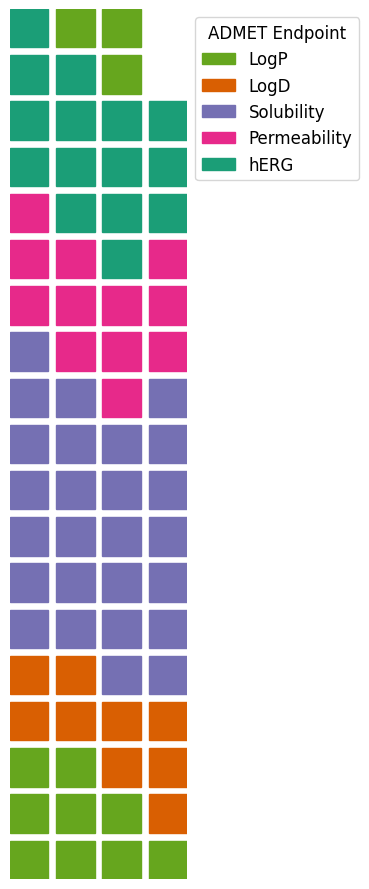

In [5]:
_waffle_plot(df_a, df_b)

# Figure 1b
### Distribution of the 92 participants per self-labeled medicinal chemistry expertise level.

/cloud-data/snf-mgln-idd-workspace/cadd_vitry/CI_Analysis_Pierre/CI_Git/__all_functions.py:1131: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  ax.add_artist(plt.Circle((0, 0), 0.6, color='black', edgecolor='black', linewidth=1))
/cloud-data/snf-mgln-idd-workspace/cadd_vitry/CI_Analysis_Pierre/CI_Git/__all_functions.py:1132: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  ax.add_artist(plt.Circle((0, 0), 0.59, color='white', edgecolor='black', linewidth=1))


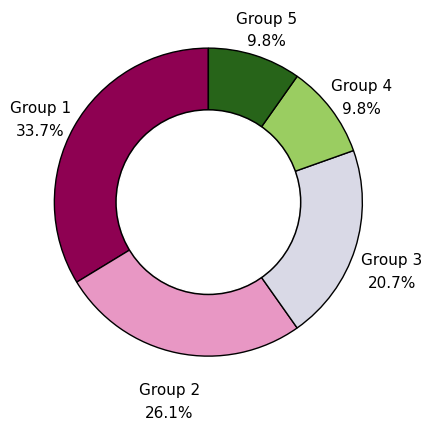

In [6]:
_distribution_groups()

# Figure 1c
### Violin plots representing the success rate by expertise level for groups 1 (low or no background) to 5 (experts) and all participants. Median is indicated by a horizontal line across the thinnest part of the boxes. Alongside the boxes, error bars extend from the median line to cover the interquartile range. The collective SR are shown as white-filled circles. The outliers per group are depicted as small circles.

/cloud-data/snf-mgln-idd-workspace/cadd_vitry/CI_Analysis_Pierre/CI_Git/__all_functions.py:872: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_A['Result'] = np.where(df_A['Correct_Answer'] == df_A['Answer'], 1, 0)
/cloud-data/snf-mgln-idd-workspace/cadd_vitry/CI_Analysis_Pierre/CI_Git/__all_functions.py:873: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_B['Result'] = np.where(df_B['Correct_Answer'] == df_B['Answer'], 1, 0)


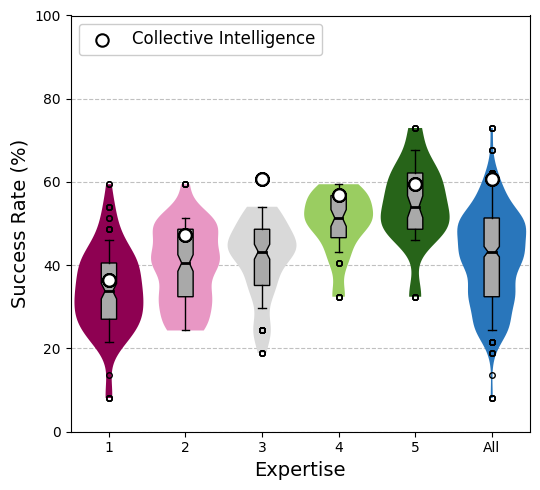

In [7]:
plot_distribution_of_scores_fig1c(df_A, df_B, './figure/Figure_1c.png')

# Figure 1d
### Bubble plot of the number and mean success rate of responses per medicinal chemist self-labeling and confidence per question. The size of the bubble represents the number of responses.

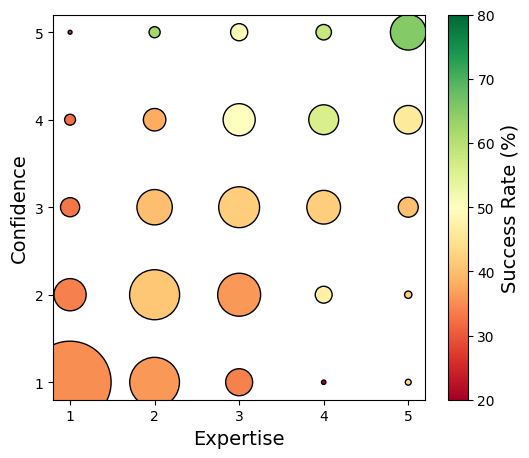

In [8]:
plot_certitude_success_distribution_color(combined_df, "./figure/Figure_1d.png")

# Figure 1e
### Distribution of the 74 questions per ADMET endpoint.

/cloud-data/snf-mgln-idd-workspace/cadd_vitry/CI_Analysis_Pierre/CI_Git/__all_functions.py:1159: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  ax.add_artist(plt.Circle((0, 0), 0.6, color='black', edgecolor='black', linewidth=1))
/cloud-data/snf-mgln-idd-workspace/cadd_vitry/CI_Analysis_Pierre/CI_Git/__all_functions.py:1160: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  ax.add_artist(plt.Circle((0, 0), 0.59, color='white', edgecolor='black', linewidth=1))


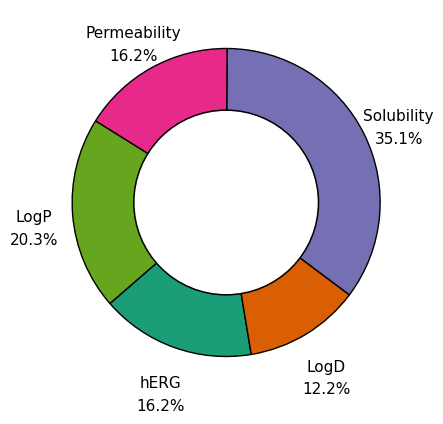

In [9]:
_distribution_ADMET()

# Figure 1F
### Violin plots representing the success rate by ADMET endpoints.

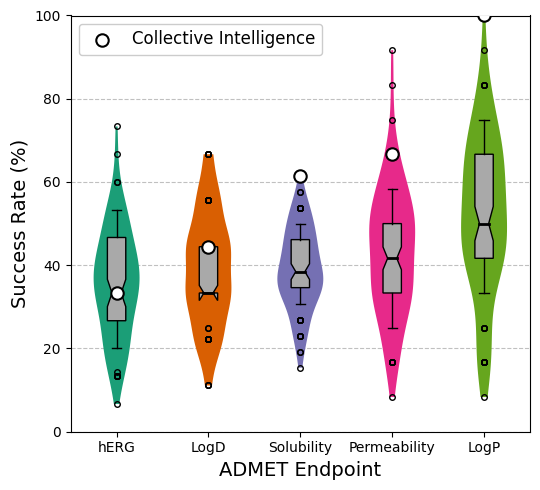

In [10]:
plot_success_rate_by_endpoint('./data/CollectiveIntelligence/CI_Answer_A.csv', './data/CollectiveIntelligence/CI_Answer_B.csv', "./figure/Figure_1f.png")

# Figure 1G
### Bubble plot of the number and mean success rate of responses per ADMET endpoint and confidence per question. 

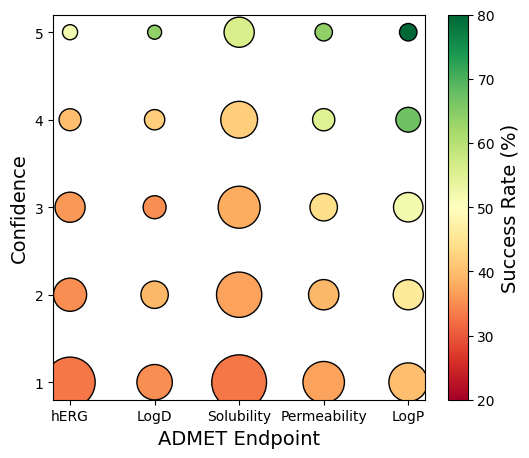

In [11]:
_bubble_ADMET(combined_df)

# Figure 1 - Bonus
### Bubble plot of the number of responses.  

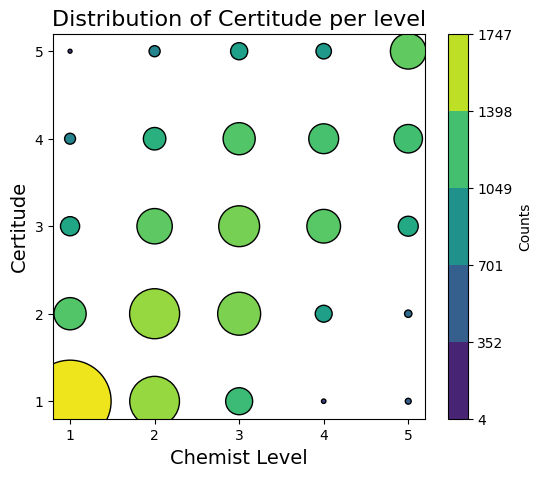

In [12]:
plot_certitude_distribution(combined_df, "./figure/Figure_1-extra.png")

# Figure 2a
### Collective performance per aggregation method. The collective answer is either obtained using democratic (most frequent), confidence-weighted (log odds), or expertise-weighted aggregation method.

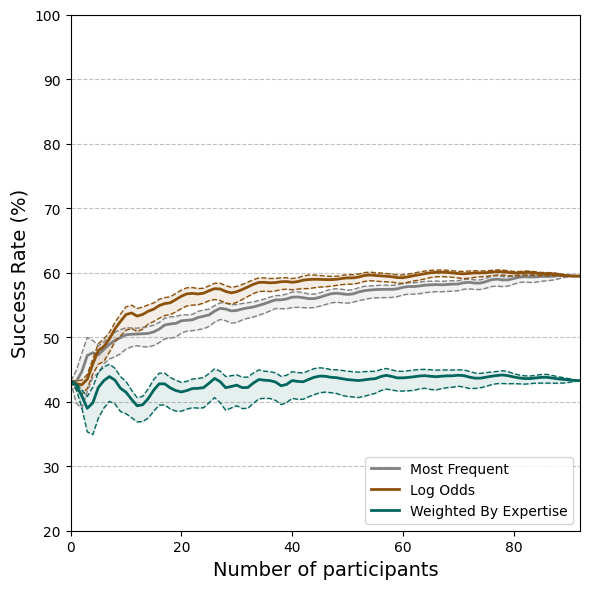

In [13]:
csv_file_paths = [f"./data/CollectiveIntelligence/Evolutive_CI_{meth}.csv" for meth in ["most_frequent", "log_odds", "weighted_by_expertise"]]
aggregation_methods = ["Most Frequent", "Log Odds",  "Weighted By Expertise"]
# Create the plot
fig, ax = plt.subplots(figsize=(6, 6))
plot_aggregation_AM(ax, csv_file_paths, aggregation_methods, False)
# Save the plot
output_file_path = "./figure/Figure_2a.png"
plt.show()
fig.savefig(output_file_path, dpi=300, bbox_inches='tight')
fig.savefig(output_file_path.replace(".png", ".svg"), dpi=300, bbox_inches='tight')

# Figure 2b
### Collective performance per expertise group using log odds aggregation method. 

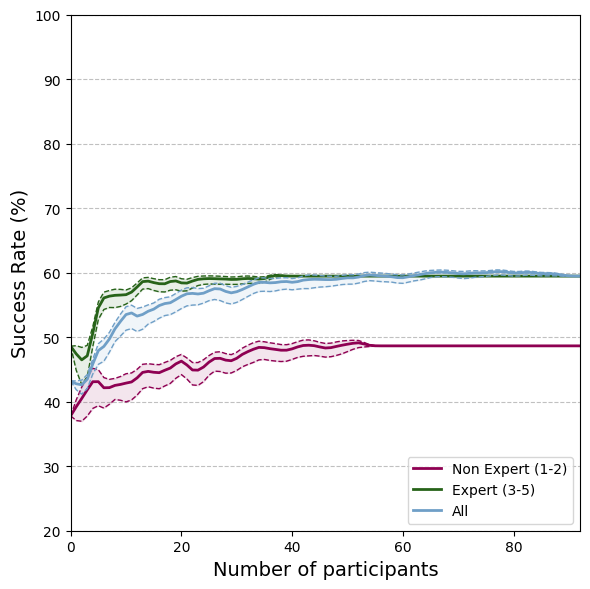

In [14]:
name_agg = 'Log Odds'
meth_agg = 'log_odds'
admet = False
plot_aggregation_ExpertGroup(f"./data/CollectiveIntelligence/Evolutive_CI_{meth_agg}.csv",f"./figure/Figure_2b.png", name_agg, admet)

# Figure 2c
### lective performance on the partition coefficient (LogP) questions.

100%|██████████| 3/3 [00:00<00:00, 85598.04it/s]


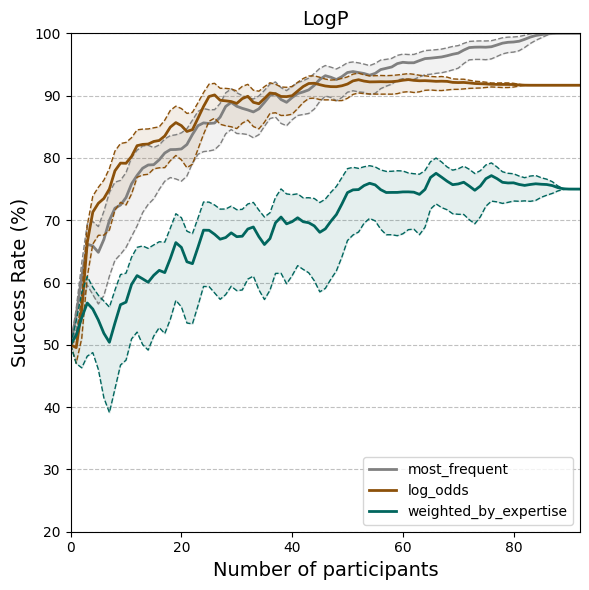

In [15]:
fig, ax = plt.subplots(figsize=(6, 6))
aggregation_methods = ["most_frequent", "log_odds", "weighted_by_expertise"]
csv_file_path = []
for meth_agg in tqdm(aggregation_methods):
    csv_file_path.append(f"./data/CollectiveIntelligence/Evolutive_CI_ADMET_LogP_{meth_agg}___STD.csv")
plot_aggregation_AM(ax, csv_file_path, aggregation_methods, "LogP") # 2
ax.set_title('LogP', fontsize=14)
ax.set_xlabel('Number of participants', fontsize=14)
ax.set_ylabel('Success Rate (%)', fontsize=14)
ax.set_xlim((0, 92))
ax.set_ylim(20, 100)
ax.grid(axis='y', linestyle='--', color='silver', alpha=1)
ax.legend( loc='lower right')
plt.tight_layout()
fig.savefig(f"./figure/Figure_2c.png", dpi=300, bbox_inches='tight')
fig.savefig(f"./figure/Figure_2c.svg", dpi=300, bbox_inches='tight')

# Figure 2d
### Collective performance on the hERG inhibition questions.

100%|██████████| 3/3 [00:00<00:00, 87992.39it/s]


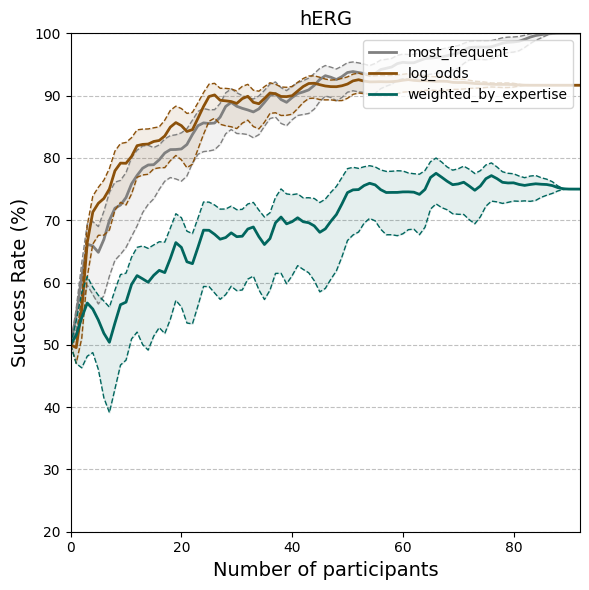

In [16]:
fig, ax = plt.subplots(figsize=(6, 6))
aggregation_methods = ["most_frequent", "log_odds", "weighted_by_expertise"]
csv_file_path = []
for meth_agg in tqdm(aggregation_methods):
    csv_file_path.append(f"./data/CollectiveIntelligence/Evolutive_CI_ADMET_LogP_{meth_agg}___STD.csv")
plot_aggregation_AM(ax, csv_file_path, aggregation_methods, "hERG") # 1
ax.set_title('hERG', fontsize=14)
ax.set_xlabel('Number of participants', fontsize=14)
ax.set_ylabel('Success Rate (%)', fontsize=14)
ax.set_xlim((0, 92))
ax.set_ylim(20, 100)
ax.grid(axis='y', linestyle='--', color='silver', alpha=1)
ax.legend( loc='upper right')
plt.tight_layout()
fig.savefig(f"./figure/Figure_2d.png", dpi=300, bbox_inches='tight')
fig.savefig(f"./figure/Figure_2d.svg", dpi=300, bbox_inches='tight')

# Figure 3

In [17]:
Merged_Slide_to_SR, CI_Input, endpoint_data, result_df_SLIDE_to_SR = _load_responses()

/cloud-data/snf-mgln-idd-workspace/cadd_vitry/CI_Analysis_Pierre/CI_Git/__all_functions.py:44: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  most_given_answer = grouped['Answer'].agg(lambda x: mode(x)[0][0])
/opt/py/conda/PyLib_Common/envs/chemprop/lib/python3.8/site-packages/scipy/stats/_stats_py.py:112: RuntimeWarning: The input array could not be properly checked for nan values. nan values will be ignored.
  warnings.warn("The input array could not be properly "
/cloud-data/snf-mgln-idd-workspace/cadd_vitry/CI_Analysis_Pierre/CI_Git/__all_functions.py:44: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurt

# Figure 3a
### Individuals are colored by ADMET endpoint. 

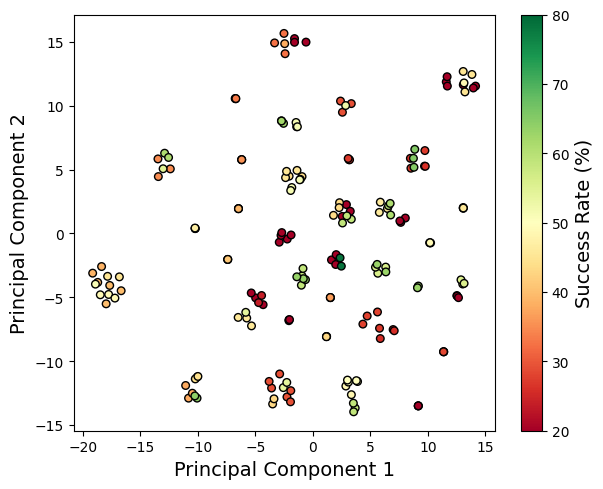

In [18]:
_UMAP_SR(result_df_SLIDE_to_SR, endpoint_data)

# Figure 3b
###  Individuals are colored by the success rate of the related question.  

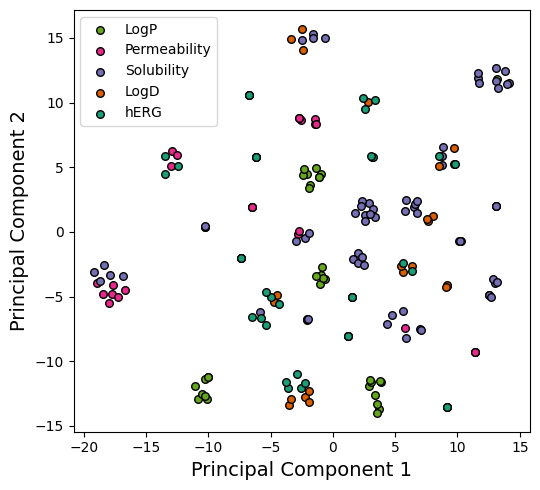

In [19]:
_UMAP_ADMET(result_df_SLIDE_to_SR, endpoint_data)

# Figure 4A
### Benchmark performances in SR per predictive method. The predictive method is a Graph Neural Network trained on public data. The bars display the mean performance alongside the standard deviation.

/cloud-data/snf-mgln-idd-workspace/cadd_vitry/CI_Analysis_Pierre/CI_Git/__all_functions.py:1424: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  endpoint_data["Value"] *= 100
/opt/py/conda/PyLib_Common/envs/chemprop/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1174: RuntimeWarning: All-NaN axis encountered
  miny = np.nanmin(masked_verts[..., 1])
/opt/py/conda/PyLib_Common/envs/chemprop/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1175: RuntimeWarning: All-NaN axis encountered
  maxy = np.nanmax(masked_verts[..., 1])


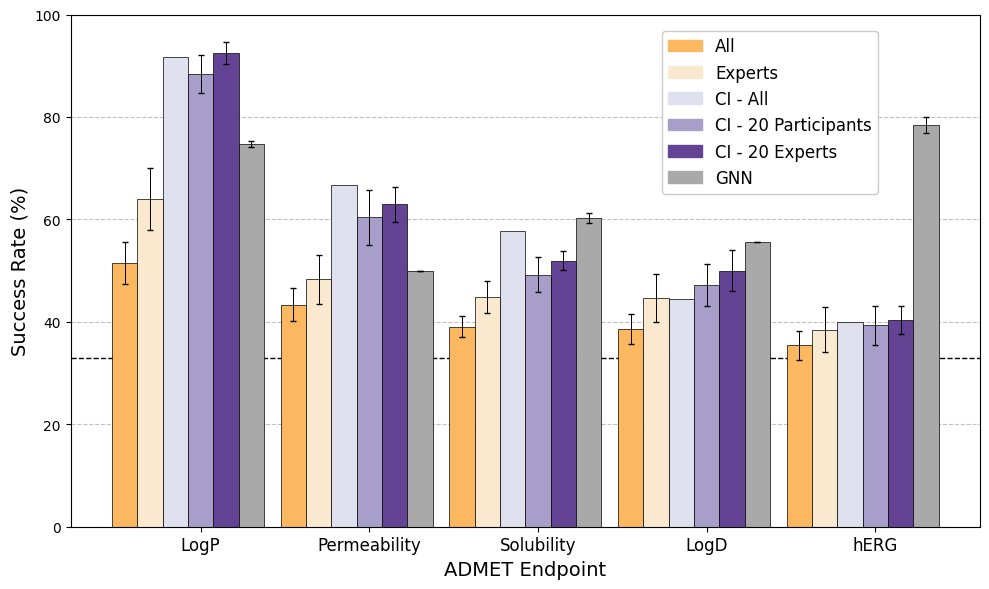

In [20]:
df_list  = [pd.read_csv(f"./data/Benchmark/set_{i}.csv") for i in range(len(os.listdir("./data/Benchmark/"))-1)]
custom_colors = {'LtR-03': 'lightgrey', 'GNN': 'lightgrey',
                 "All":'#de77ae' ,"Experts": '#f7cbe4',
                "CI - All": '#f7f7f7',"CI - 20 Participants": '#ceeba9',
                "CI - 20 Experts": '#80bc42'}

_generatre_benchmark(df_list)

# Figure 4B
### Answer success and failure count per ADMET endpoint. Answers are grouped per source such as human, GNN (predictive model), GNN & Human, and all. 

In [21]:
unique_slide_ids = pd.read_csv("./data/CollectiveIntelligence/CI_response_GNN.csv")
unique_slide_ids_subset_col = unique_slide_ids[['Slide_ID','Endpoint','Correct_i']]
unique_slide_ids_subset_col = unique_slide_ids_subset_col.sort_values("Slide_ID")
unique_slide_ids_human = pd.read_csv("./data/CollectiveIntelligence/CI_response_Human.csv")
unique_slide_ids_human = unique_slide_ids_human[unique_slide_ids_human["Chemist Level"]==3]
unique_slide_ids_human = unique_slide_ids_human[['Slide_ID','Endpoint','Most_Frequent_Correct']].sort_values("Slide_ID")
unique_slide_ids_human["Most_Frequent_Correct"] = unique_slide_ids_human["Most_Frequent_Correct"]*2
unique_slide_ids_human["GNN"] = unique_slide_ids_subset_col["Correct_i"].tolist()
unique_slide_ids_human["Human"] = unique_slide_ids_human["Most_Frequent_Correct"].tolist()
unique_slide_ids_human["Cooperation"] = unique_slide_ids_human["GNN"].astype(float) + unique_slide_ids_human["Human"].astype(float)
unique_slide_ids_human.to_csv("./data/CollectiveIntelligence/Cooperation_GNN_Human.csv", index = False)
unique_slide_ids_human = unique_slide_ids_human.fillna(0)

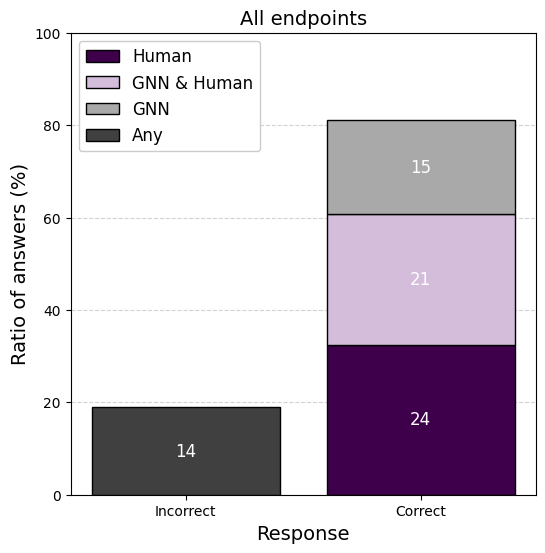

In [22]:

unique_slide_ids_human = unique_slide_ids_human.sort_values("Cooperation")
data = unique_slide_ids_human["Cooperation"].tolist()



# Assuming unique_slide_ids_human is already defined and sorted
endpoints = ["LogP", "Permeability", "Solubility", "LogD", "hERG"]


# Count occurrences of each category
counts = Counter(data)
methods = ["GNN",
"Human",
"GNN & Human",]
custom_colors = {'GNN': 'lightgrey',
                "GNN & Human": 'k',
                "Human": '#80bc42'
                }

colors = plt.cm.PRGn_r(np.linspace(0.3, 1, len(custom_colors)))  # Colors based on methods
custom_colors = dict(zip(methods, colors))
custom_colors['GNN'] = 'darkgrey'
color_idx = 0
method_color_dict = {}
for method in methods:
    if method in custom_colors:
        method_color_dict[method] = custom_colors[method]
    else:
        method_color_dict[method] = colors[color_idx]
        color_idx += 1
custom_colors = {'GNN': 'darkgrey',
 'Human': [0.25098039, 0.        , 0.29411765, 1.        ],
 'GNN & Human':  [0.8319108 , 0.73740869, 0.85982314, 1.        ]}
# Your color dictionary
custom_colors['Human'] = rgb_to_hex(custom_colors['Human'])
custom_colors['GNN & Human'] = rgb_to_hex(custom_colors['GNN & Human'])

# Recategorize data
fail_count = counts[0]
gnn_success_count = counts[1]
human_success_count = counts[2]
gnn_human_success_count = counts[3]

# Calculate percentages
total = sum([fail_count, gnn_success_count, human_success_count, gnn_human_success_count])
fail_percentage = (fail_count / total) * 100
gnn_percentage = (gnn_success_count / total) * 100
human_percentage = (human_success_count / total) * 100
gnn_human_percentage = (gnn_human_success_count / total) * 100

# Labels for the plot
labels = ["Incorrect", "Correct"]

# Creating the bar plot
fig, ax1 = plt.subplots(figsize=(6, 6))

# Plot bars
bar1 = ax1.bar(labels[0], fail_percentage, color='#404040', edgecolor='black', label = "Any")
bars_success = ax1.bar(labels[1], [human_percentage, gnn_human_percentage, gnn_percentage], 
                       color=[custom_colors['Human'], custom_colors['GNN & Human'], custom_colors['GNN']], 
                       bottom=[0, human_percentage, human_percentage + gnn_human_percentage], 
                       edgecolor='black', label=['Human', 'GNN & Human', 'GNN'])

# Adding text in the center of each bar
def add_text_to_bars(bars_container, counts):
    for bar, count in zip(bars_container.patches, counts):
        height = bar.get_height()
        ax1.text(bar.get_x() + bar.get_width() / 2.0, bar.get_y() + height / 2.0, str(count), ha='center', va='center', color='white', fontsize=12)
        
add_text_to_bars(bar1, [fail_count])
add_text_to_bars(bars_success, [human_success_count, gnn_human_success_count, gnn_success_count])


# Adding title and labels

# Add counts above the bars
# plt.text(0, fail_count + 0.005 * max(fail_count, sum(counts.values())), str(fail_count), ha='center', va='bottom')
# plt.text(1, sum(counts.values()), str(sum(counts.values())), ha='center', va='bottom')

# Add legend
ax1.legend(loc='upper left', framealpha=1, fontsize=12)
ax1.grid(axis='y', linestyle='--', color='silver', alpha=1)
ax1.set_axisbelow(True)

ax1.set_xlabel('Response', fontsize=14)
ax1.set_ylabel('Ratio of answers (%)', fontsize=14)
ax1.set_title('All endpoints', fontsize=14)

plt.ylim((0,100))

# Add grid behind bars
plt.grid(axis='y', linestyle='--', alpha=0.7, zorder=0)

# Show the plot
plt.show()

fig.savefig("./figure/Figure_4b.png", format='png', dpi=300)  # Save as PNG
fig.savefig("./figure/Figure_4b.svg", format='svg')           # Save as SVG


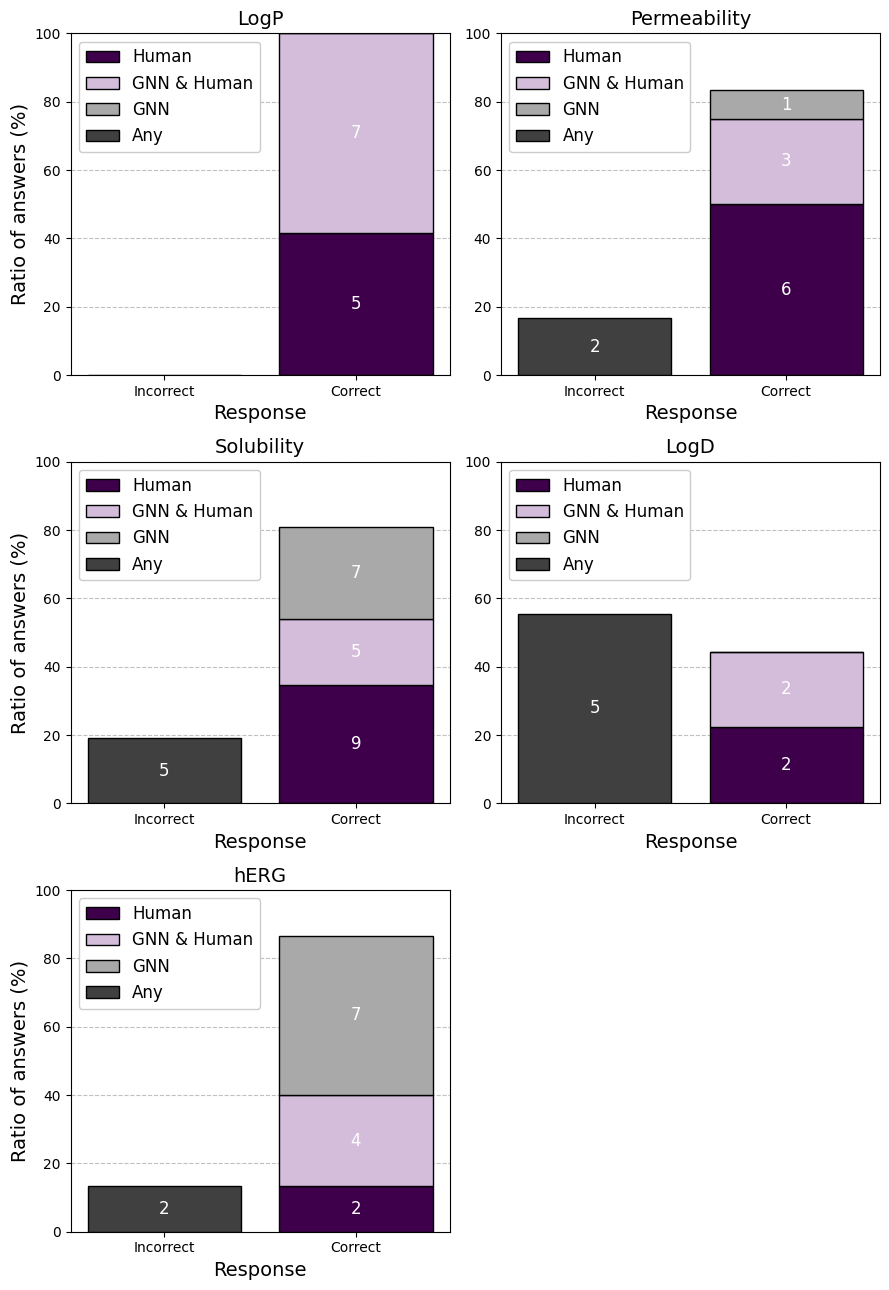

In [23]:

# Assuming unique_slide_ids_human is already defined and sorted
endpoints = ["LogP", "Permeability", "Solubility", "LogD", "hERG"]
fig, axs = plt.subplots(3, 2, figsize=(9, 13))  # Adjust the size as needed

custom_colors = {
    'GNN': 'darkgrey',
    'Human': [0.25098039, 0.0, 0.29411765, 1.0],
    'GNN & Human': [0.8319108, 0.73740869, 0.85982314, 1.0]
}

custom_colors['Human'] = rgb_to_hex(custom_colors['Human'])
custom_colors['GNN & Human'] = rgb_to_hex(custom_colors['GNN & Human'])

# Flatten the axs array for easy indexing
axs = axs.flatten()

for ij, end in enumerate(endpoints):
    ax = axs[ij]
    #fig, ax = plt.subplots(figsize=(5.5, 5.))  
    unique_slide_ids_human_temp = unique_slide_ids_human[unique_slide_ids_human["Endpoint"] == end]
    data = unique_slide_ids_human_temp["Cooperation"].tolist()

    # Count occurrences of each category
    counts = Counter(data)

    # Recategorize data
    fail_count = counts[0]
    gnn_success_count = counts[1]
    human_success_count = counts[2]
    gnn_human_success_count = counts[3]

    # Calculate percentages
    total = sum([fail_count, gnn_success_count, human_success_count, gnn_human_success_count])
    fail_percentage = (fail_count / total) * 100
    gnn_percentage = (gnn_success_count / total) * 100
    human_percentage = (human_success_count / total) * 100
    gnn_human_percentage = (gnn_human_success_count / total) * 100

    # Labels for the plot
    labels = ["Incorrect", "Correct"]

    # Plot bars
    bar1 = ax.bar(labels[0], fail_percentage, color='#404040', edgecolor='black', label = "Any")
    bars_success = ax.bar(labels[1], [human_percentage, gnn_human_percentage, gnn_percentage], 
                          color=[custom_colors['Human'], custom_colors['GNN & Human'], custom_colors['GNN']], 
                          bottom=[0, human_percentage, human_percentage + gnn_human_percentage], 
                          edgecolor='black', label=['Human', 'GNN & Human', 'GNN'])

    # Adding text in the center of each bar
    def add_text_to_bars(bars_container, counts):
        for bar, count in zip(bars_container.patches, counts):
            height = bar.get_height()
            if count > 0:
                ax.text(bar.get_x() + bar.get_width() / 2.0, bar.get_y() + height / 2.0, str(count), ha='center', va='center', color='white', fontsize=12)

    add_text_to_bars(bar1, [fail_count])
    add_text_to_bars(bars_success, [human_success_count, gnn_human_success_count, gnn_success_count])

    # Adding title, labels, and legend
    ax.set_title(f"{end}", fontsize=14)
    ax.set_xlabel('Response', fontsize=14)
    ax.set_ylabel('Ratio of answers (%)', fontsize=14)
    ax.legend(loc='upper left', framealpha=1, fontsize=12)
    ax.grid(axis='y', linestyle='--', color='silver', alpha=1)
    ax.set_axisbelow(True)
    ax.set_ylim(0, 100)
    #fig.savefig(f"./figure/Figure_4b-{end}.png")  # Save each plot as a PNG file named after the endpoint
    #plt.close(fig)  # Close the figure to free up memory

    
    
    
axs[1].set_ylabel('')  # Remove y-axis label from the second plot
axs[3].set_ylabel('')  # Remove y-axis label from the fourth plot

# Hide the last subplot (which is empty)
axs[-1].axis('off')

plt.tight_layout()
plt.show()

# Save the entire subplot
fig.savefig("./figure/Figure_4b-extra.png", format='png', dpi=300)  # Save as PNG
fig.savefig("./figure/Figure_4b-extra.svg", format='svg')             # Save as SVG


# Figure S2A
 SR for groups 1-2 (low or no background), 3-5 (experts) and all the participants. The median is shown as a horizontal line across the thinnest part of the grey boxes. Alongside the boxes, error bars extend from the median line to cover the interquartile range. The collective or democratic SR are shown as white-filled circles. The outliers per group are depicted as small circles. 

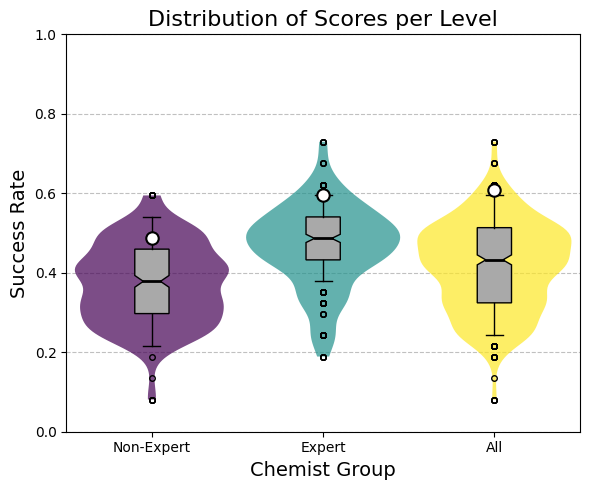

In [24]:
plot_distribution_of_scores(df_A, df_B, './figure/Figure_S2a.png')

# Figure S2B
### SR for groups 1-2 (low or no background), 3 (averaged and mixed level), 4-5 (experts) and all the participants. 

/cloud-data/snf-mgln-idd-workspace/cadd_vitry/CI_Analysis_Pierre/CI_Git/__all_functions.py:972: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_A['Result'] = np.where(df_A['Correct_Answer'] == df_A['Answer'], 1, 0)
/cloud-data/snf-mgln-idd-workspace/cadd_vitry/CI_Analysis_Pierre/CI_Git/__all_functions.py:973: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_B['Result'] = np.where(df_B['Correct_Answer'] == df_B['Answer'], 1, 0)


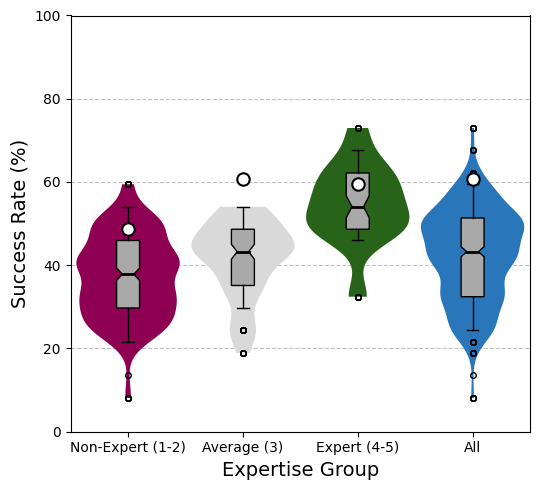

In [25]:
plot_distribution_of_scores_S1B(df_A, df_B, './figure/Figure_S2b.png')

# Figure S2C
### SR by non-experts, i.e., participants with personal SR less than 50%, and experts, i.e. individuals with SR more than 50%. The violin plot of the SR of all participants is shown again here as a guide for the eye.

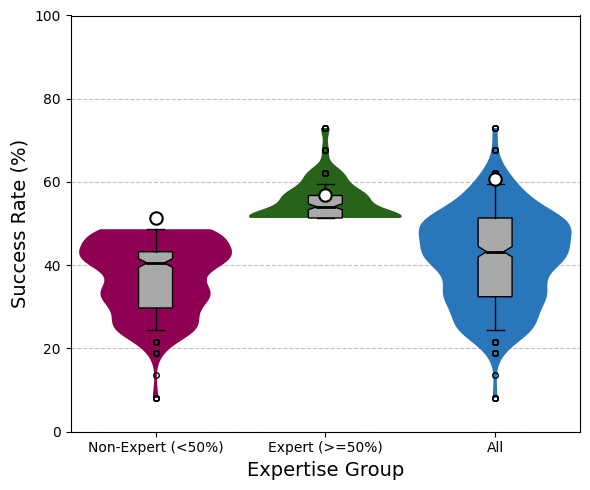

In [26]:
df_A['Result'] = np.where(df_A['Correct_Answer'] == df_A['Answer'], 1, 0)
df_B['Result'] = np.where(df_B['Correct_Answer'] == df_B['Answer'], 1, 0)
combined_scores = pd.concat([compute_scores(df_A), compute_scores(df_B)], ignore_index=True)
combined_scores_all = combined_scores.copy()
combined_scores_all["Chemist Level"] = 6
combined_scores = pd.concat([combined_scores_all, combined_scores])
df_A_all = df_A.copy()
df_A_all["Chemist Level"] = 6
df_A = pd.concat([df_A_all, df_A])
df_B_all = df_B.copy()
df_B_all["Chemist Level"] = 6
df_B = pd.concat([df_B_all, df_B])
# Reclassification based on success rate
combined_scores['Chemist Group'] = reclassify_chemist_by_sr(combined_scores)
temp_c = combined_scores.drop_duplicates("Chemist")
# Example usage
my_dict = columns_to_dict(temp_c, 'Chemist', 'Score')
# Map the dictionary onto a new column in a DataFrame (e.g., df_A)
df_A['Score'] = df_A['Chemist'].map(my_dict)
# Similar mapping can be done for df_B if needed
df_B['Score'] = df_B['Chemist'].map(my_dict)
df_A["Chemist Group"] = reclassify_chemist_by_sr(df_A)
df_B["Chemist Group"] = reclassify_chemist_by_sr(df_B)
most_frequent_combined = pd.concat([compute_most_frequent(df_A), compute_most_frequent(df_B)]).groupby('Chemist Group')['Most_Frequent_Correct'].mean().reset_index(name='SR')
most_frequent_combined_weighted = pd.concat([compute_most_frequent(df_A, True), compute_most_frequent(df_B, True)]).groupby('Chemist Group')['Most_Frequent_Correct'].mean().reset_index(name='SR')
chemist_levels = sorted(combined_scores['Chemist Group'].unique())
colors = plt.get_cmap('PiYG')(np.linspace(0., 1, len(chemist_levels) - 1)).tolist()
colors.append('#2976bb')  # Adding the specific color for the 'All' group
fig, ax = plt.subplots(figsize=(6, 5))
for i, level in enumerate(chemist_levels):
    score_values = combined_scores[combined_scores['Chemist Group'] == level]['Score']
    if score_values.empty:
        continue
    vp = ax.violinplot(score_values*100, positions=[i], widths=0.9, showextrema=False)
    for pc_idx, pc in enumerate(vp['bodies']):
        pc.set_facecolor(colors[i])
        pc.set_alpha(1)
    bp = ax.boxplot(score_values*100, positions=[i], patch_artist=True, notch=True, widths=0.2, whis=0.5,
                    flierprops={'marker': 'o', 'markersize': 4})
    for box in bp['boxes']:
        box.set(facecolor='darkgrey')
    for median in bp['medians']:
        median.set(color='black', linewidth=2)
# Compute the success rate using the most frequent answer for dataset A
most_frequent_A = df_A.groupby(['Chemist Group', 'Question']).agg(lambda x: x.mode().iloc[0]).reset_index()
most_frequent_A['Most_Frequent_Correct'] = np.where(most_frequent_A['Correct_Answer'] == most_frequent_A['Answer'], 1, 0)
most_frequent_B = df_B.groupby(['Chemist Group', 'Question']).agg(lambda x: x.mode().iloc[0]).reset_index()
most_frequent_B['Most_Frequent_Correct'] = np.where(most_frequent_B['Correct_Answer'] == most_frequent_B['Answer'], 1, 0)
most_frequent_combined = pd.concat([most_frequent_A, most_frequent_B])
most_frequent_combined = most_frequent_combined.groupby('Chemist Group').agg(
    success_rate=pd.NamedAgg(column='Most_Frequent_Correct', aggfunc='mean')
).reset_index()
most_frequent_combined = most_frequent_combined.rename(columns = {"success_rate":"SR"})
most_frequent_combined_weighted_both = pd.concat([compute_most_frequent_combined_weight(df_A), compute_most_frequent_combined_weight(df_B)]).groupby('Chemist Group')['Most_Frequent_Correct'].mean().reset_index(name='SR')
ax.scatter(most_frequent_combined['Chemist Group']-1, most_frequent_combined['SR']*100, color='white', edgecolor='black', linewidth=1.5, zorder=4, alpha=1, marker="o", s=80)
plt.xticks(range(len(chemist_levels)), chemist_levels)
ax.set_xlabel('Expertise Group', fontsize=14)
chemist_levels = ["Non-Expert (<50%)", "Expert (>=50%)", "All"]
plt.xticks(range(len(chemist_levels)), chemist_levels)
ax.set_xticklabels(chemist_levels)
ax.set_ylabel('Success Rate (%)', fontsize=14)
ax.grid(axis='y', linestyle='--', color='silver', alpha=1)
ax.set_axisbelow(True)
ax.set_ylim((0,100))
plt.tight_layout()
plt.show()
fig.savefig('./figure/Figure_S2c.svg', dpi=300, bbox_inches='tight')
fig.savefig('./figure/Figure_S2c.png', dpi=300, bbox_inches='tight')

# Figure S3A
### Bar plot of the ratio of answers per expertise level grouped by confidence from low (red) to high (blue).

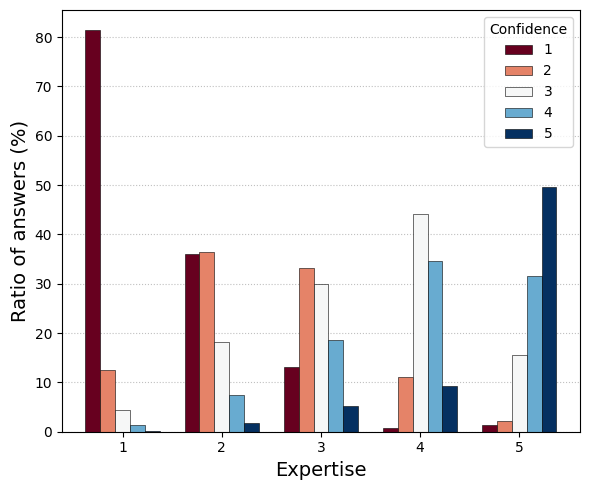

In [27]:
combined_df_k = combined_df[combined_df["Chemist Level"]!="6"]
certitude_vals = combined_df_k['Certitude'].unique()
levels = sorted(combined_scores['Chemist Level'].unique())
levels = [1, 2, 3, 4, 5]
level_counts = combined_df_k['Chemist Level'].value_counts().reindex(levels, fill_value=0)
certitude_vals = combined_df_k['Certitude'].unique()
certitude_vals.sort()
fig, ax = plt.subplots(figsize=(6, 5))
color_map = plt.cm.RdBu(np.linspace(0, 1, len(certitude_vals)))
for idx, certitude_val in enumerate(certitude_vals):
    certitude_counts = combined_df_k[combined_df_k['Certitude'] == certitude_val]['Chemist Level'].value_counts().reindex(levels, fill_value=0).values
    percentages = (certitude_counts / level_counts) * 100
    ax.bar(np.array(levels) + 0.15 * (idx - (len(certitude_vals) - 1) / 2), percentages, width=0.15, label=f'{int(certitude_val)}', alpha=1, color=color_map[idx], edgecolor='black', linewidth=0.4)
ax.set_xlabel('Expertise', fontsize=14)
ax.set_ylabel('Ratio of answers (%)', fontsize=14)
ax.set_xticks(levels)
ax.grid(axis='y', linestyle='dotted', color='silver', alpha=1)
ax.set_axisbelow(True)
ax.legend(title="Confidence", loc="upper right")
plt.tight_layout()
fig.savefig('./figure/Figure_S3a.svg', dpi=300, bbox_inches='tight')
fig.savefig('./figure/Figure_S3a.png', dpi=300, bbox_inches='tight')
plt.show()

# Figure S3B
### Bar plot of the ratio of answers per ADMET endpoint. 

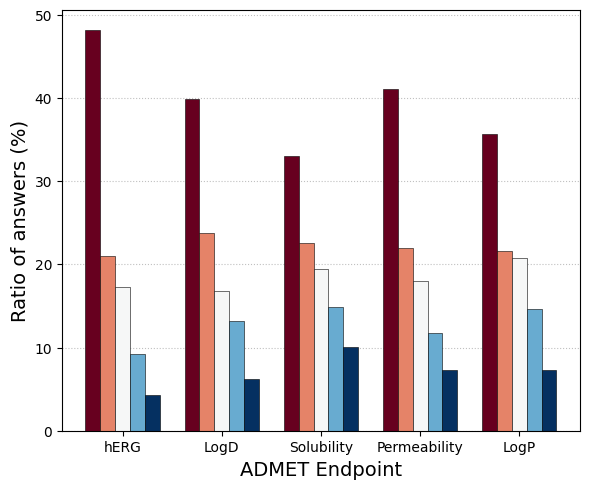

In [28]:
# Calculate percentages
certitude_vals = sorted(combined_df['Certitude'].unique())
ordered_endpoints = ["LogP", "Permeability", "Solubility", "LogD", "hERG"][::-1]
level_counts = combined_df['Endpoint'].value_counts().reindex(ordered_endpoints, fill_value=0)
fig, ax = plt.subplots(figsize=(6, 5))
color_map = plt.cm.RdBu(np.linspace(0, 1, len(certitude_vals)))
# Position offset for each bar
bar_width = 0.15
x = np.arange(len(ordered_endpoints))
for idx, certitude_val in enumerate(certitude_vals):
    certitude_counts = combined_df[combined_df['Certitude'] == certitude_val]['Endpoint'].value_counts().reindex(ordered_endpoints, fill_value=0).values
    percentages = (certitude_counts / level_counts) * 100
    ax.bar(x + bar_width * (idx - (len(certitude_vals) - 1) / 2), percentages, width=bar_width, label=f'{int(certitude_val)}', alpha=1, color=color_map[idx], edgecolor='black', linewidth=0.4)
ax.set_xlabel('ADMET Endpoint', fontsize=14)
ax.set_ylabel('Ratio of answers (%)', fontsize=14)
ax.set_xticks(x)
ax.set_xticklabels(ordered_endpoints)
ax.grid(axis='y', linestyle='dotted', color='silver', alpha=1)
ax.set_axisbelow(True)
plt.tight_layout()
fig.savefig('./figure/Figure_S3b.svg', dpi=300, bbox_inches='tight')
fig.savefig('./figure/Figure_S3b.png', dpi=300, bbox_inches='tight')
plt.show()

# Figure S4
### Success rate distribution from all participants per ADMET endpoint.

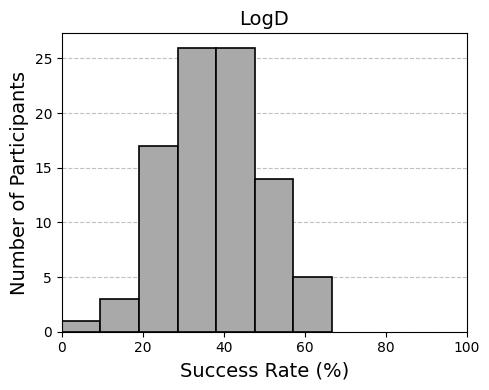

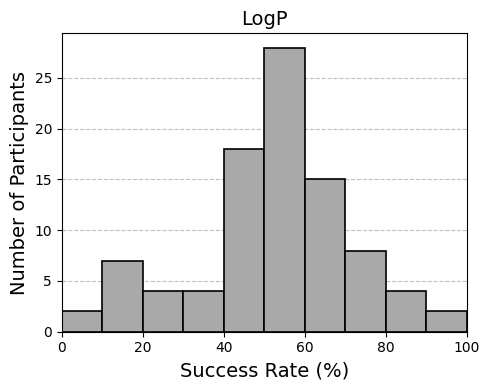

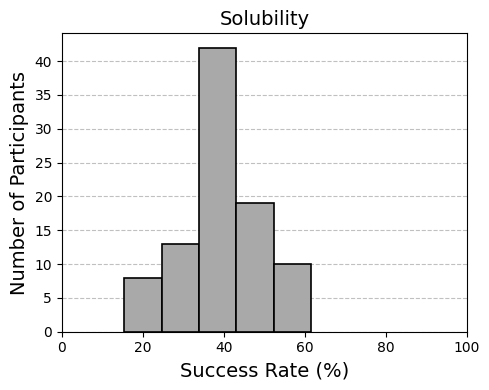

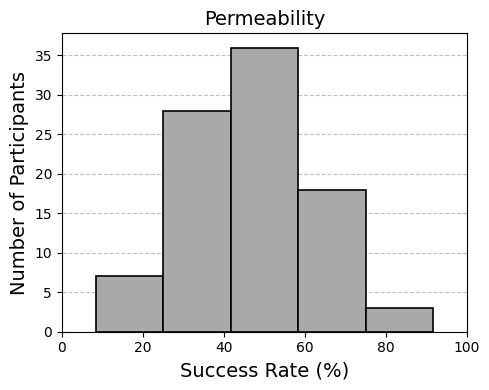

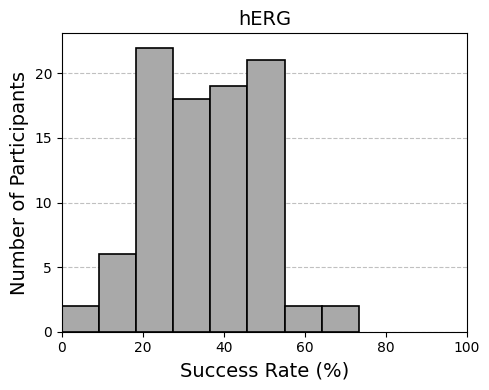

In [29]:
user_success_rate_by_endpoint = combined_df.groupby(['Chemist', 'Endpoint'])['Result'].mean().reset_index()
fig, ax1 = plt.subplots(figsize=(5, 4))
values_l = user_success_rate_by_endpoint[user_success_rate_by_endpoint["Endpoint"]=="LogD"]
values_l = values_l["Result"].tolist()
values_l = [x * 100 for x in values_l]
hist_data, bins, _ = ax1.hist(values_l, bins=7, alpha=1, edgecolor='black', linewidth=1.2)
bin_centers = 0.5 * (bins[:-1] + bins[1:])
colors = plt.cm.gray(bin_centers / max(bin_centers))
for thispatch, color in zip(_, colors):
    thispatch.set_facecolor("darkgrey")

ax1.grid(axis='y', linestyle='--', color='silver', alpha=1)
ax1.set_axisbelow(True)
ax1.set_title('LogD', fontsize=14)
ax1.set_xlabel('Success Rate (%)', fontsize=14)
ax1.set_ylabel('Number of Participants', fontsize=14)
plt.xlim((0, 100))  # New x-axis limits
plt.tight_layout()
npk = "LogD"
fig.savefig(f"./figure/Figure_S4-{npk}.svg", format='svg')
fig.savefig(f"./figure/Figure_S4-{npk}.png", format='png')

plt.show()


fig, ax1 = plt.subplots(figsize=(5, 4))
values_l = user_success_rate_by_endpoint[user_success_rate_by_endpoint["Endpoint"]=="LogP"]
values_l = values_l["Result"].tolist()
values_l = [x * 100 for x in values_l]

hist_data, bins, _ = ax1.hist(values_l, alpha=1, edgecolor='black', linewidth=1.2)



bin_centers = 0.5 * (bins[:-1] + bins[1:])
colors = plt.cm.gray(bin_centers / max(bin_centers))
for thispatch, color in zip(_, colors):
    thispatch.set_facecolor("darkgrey")

ax1.grid(axis='y', linestyle='--', color='silver', alpha=1)
ax1.set_axisbelow(True)
ax1.set_title('LogP', fontsize=14)
ax1.set_xlabel('Success Rate (%)', fontsize=14)
ax1.set_ylabel('Number of Participants', fontsize=14)
plt.xlim((0, 100))  # New x-axis limits
plt.tight_layout()
npk = "LogP"
fig.savefig(f"./figure/Figure_S4-{npk}.svg", format='svg')
fig.savefig(f"./figure/Figure_S4-{npk}.png", format='png')

plt.show()


fig, ax1 = plt.subplots(figsize=(5, 4))
values_l = user_success_rate_by_endpoint[user_success_rate_by_endpoint["Endpoint"]=="Solubility"]
values_l = values_l["Result"].tolist()
values_l = [x * 100 for x in values_l]

hist_data, bins, _ = ax1.hist(values_l,bins = 5, alpha=1, edgecolor='black', linewidth=1.2)


bin_centers = 0.5 * (bins[:-1] + bins[1:])
colors = plt.cm.gray(bin_centers / max(bin_centers))
for thispatch, color in zip(_, colors):
    thispatch.set_facecolor("darkgrey")

ax1.grid(axis='y', linestyle='--', color='silver', alpha=1)
ax1.set_axisbelow(True)
ax1.set_title('Solubility', fontsize=14)
ax1.set_xlabel('Success Rate (%)', fontsize=14)
ax1.set_ylabel('Number of Participants', fontsize=14)
plt.xlim((0, 100))  # New x-axis limits
plt.tight_layout()
npk = "Solubility"
fig.savefig(f"./figure/Figure_S4-{npk}.svg", format='svg')
fig.savefig(f"./figure/Figure_S4-{npk}.png", format='png')

plt.show()



fig, ax1 = plt.subplots(figsize=(5, 4))
values_l = user_success_rate_by_endpoint[user_success_rate_by_endpoint["Endpoint"]=="Permeability"]
values_l = values_l["Result"].tolist()
values_l = [x * 100 for x in values_l]

hist_data, bins, _ = ax1.hist(values_l,bins = 5, alpha=1, edgecolor='black', linewidth=1.2)


bin_centers = 0.5 * (bins[:-1] + bins[1:])
colors = plt.cm.gray(bin_centers / max(bin_centers))
for thispatch, color in zip(_, colors):
    thispatch.set_facecolor("darkgrey")

ax1.grid(axis='y', linestyle='--', color='silver', alpha=1)
ax1.set_axisbelow(True)
ax1.set_title('Permeability', fontsize=14)
ax1.set_xlabel('Success Rate (%)', fontsize=14)
ax1.set_ylabel('Number of Participants', fontsize=14)
plt.xlim((0, 100))  # New x-axis limits
plt.tight_layout()
npk = "Permeability"
fig.savefig(f"./figure/Figure_S4-{npk}.svg", format='svg')
fig.savefig(f"./figure/Figure_S4-{npk}.png", format='png')

plt.show()

fig, ax1 = plt.subplots(figsize=(5, 4))
values_l = user_success_rate_by_endpoint[user_success_rate_by_endpoint["Endpoint"]=="hERG"]
values_l = values_l["Result"].tolist()

# Scale the values to be in the range 0-100
values_l = [x * 100 for x in values_l]

hist_data, bins, _ = ax1.hist(values_l, bins =8, alpha=1, edgecolor='black', linewidth=1.2)

bin_centers = 0.5 * (bins[:-1] + bins[1:])
colors = plt.cm.gray(bin_centers / max(bin_centers))
for thispatch, color in zip(_, colors):
    thispatch.set_facecolor("darkgrey")

ax1.grid(axis='y', linestyle='--', color='silver', alpha=1)
ax1.set_axisbelow(True)
ax1.set_title('hERG', fontsize=14)
ax1.set_xlabel('Success Rate (%)', fontsize=14)
ax1.set_ylabel('Number of Participants', fontsize=14)
plt.xlim((0, 100))  # New x-axis limits
plt.tight_layout()
npk = "hERG"
fig.savefig(f"./figure/Figure_S4-{npk}.svg", format='svg')
fig.savefig(f"./figure/Figure_S4-{npk}.png", format='png')

plt.show()


# Figure S5a
### Session one colored by expertise level. 

In [30]:
df_A = pd.read_csv('./data/CollectiveIntelligence/CI_Answer_A.csv', sep=',')
df_B = pd.read_csv('./data/CollectiveIntelligence/CI_Answer_B.csv', sep=',')
replace_dict = {'A': 1.0, 'B': 3.0, 'C': 5.0}
tsne_results = apply_tsne_transformation(df_A, replace_dict)
chemist_df = df_A[['Chemist', 'Chemist Level', 'Result']].groupby(by='Chemist').mean().reset_index()
chemist_levels = chemist_df['Chemist Level']  # Assuming chemist_df is defined
success_rate = chemist_df['Result']*100  # Assuming chemist_df is defined

/opt/py/conda/PyLib_Common/envs/chemprop/lib/python3.8/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


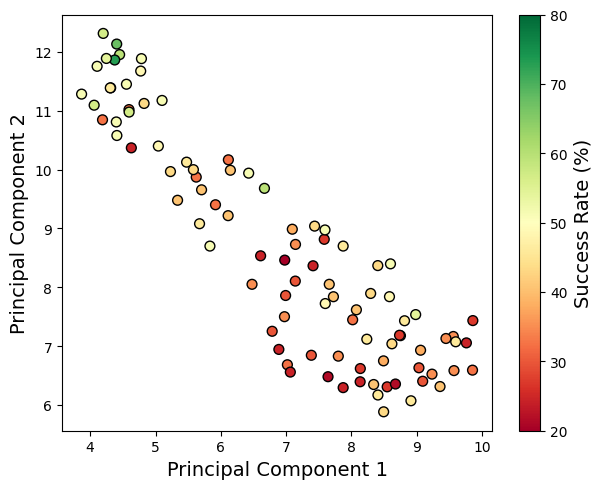

In [31]:
norm = Normalize(vmin=20, vmax=80)
fig, ax = plt.subplots(figsize=(6.2, 5))
# Creating a dummy scatter plot for the colorbar
scatter = ax.scatter(tsne_results[:,0], tsne_results[:,1], c=success_rate, s=50,
                     cmap='RdYlGn', alpha=1, edgecolors='k', linewidth=1, norm=norm)
ax.set_xlabel('Principal Component 1', fontsize=14)
ax.set_ylabel('Principal Component 2', fontsize=14)
ax.spines['right'].set_visible(True)
ax.spines['top'].set_visible(True)
cbar = fig.colorbar(scatter, ax=ax, orientation="vertical")
cbar.set_ticks(np.arange(20, 81, 10))  # Setting ticks at regular intervals
cbar.set_label('Success Rate (%)', fontsize=14)
plt.tight_layout()
fig.savefig("./figure/Figure_S5a.svg", format='svg')
fig.savefig("./figure/Figure_S5a.png", format='png')
plt.show()

# Figure S5b
### Session one colored by success rate. 

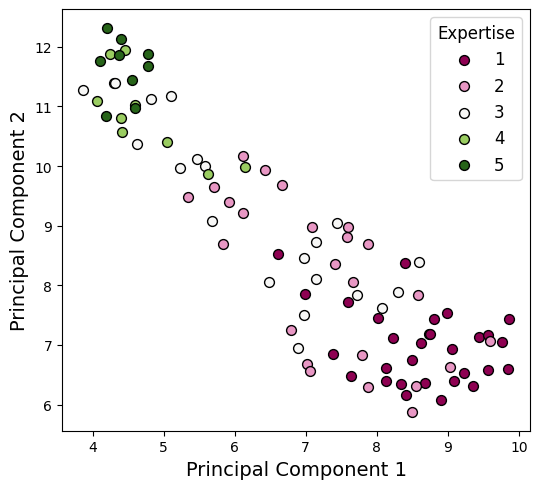

In [32]:
sr_column='SR'
endpoint_column='Endpoint'
answer_correct_column='Answer_Correct'
# Create a colormap for the endpoints
unique_endpoints = endpoint_data[endpoint_column].unique()
unique_endpoints = ["LogP", "Permeability", "Solubility", "LogD", "hERG"]
colors = plt.get_cmap('PiYG')(np.linspace(0.2, .8, len(unique_endpoints)))  # Using colors from the PiYG colormap
# Plotting
fig, ax = plt.subplots(figsize=(5.5, 5))
# Create a DataFrame for plotting
pv = pd.DataFrame({
    'Component_1': tsne_results[:, 0],
    'Component_2': tsne_results[:, 1],
    'Chemist_Level': chemist_levels
})
pv = pv.sort_values("Chemist_Level")
# Getting unique chemist levels and creating a color map for them
unique_levels = pv['Chemist_Level'].unique()
colors = plt.get_cmap('PiYG')(np.linspace(0., 1, len(unique_levels)))
level_to_color = dict(zip(unique_levels, colors))
# Plotting
# Plot each chemist level with its color
for level, color in level_to_color.items():
    level_data = pv[pv['Chemist_Level'] == level]
    ax.scatter(level_data['Component_1'], level_data['Component_2'], 
               color=color, label=str(int(level)), s=50, alpha=1, edgecolors='k', linewidth=1)
# Set titles and labels
ax.set_xlabel('Principal Component 1', fontsize=14)
ax.set_ylabel('Principal Component 2', fontsize=14)
ax.spines['right'].set_visible(True)
ax.spines['top'].set_visible(True)
# Create a legend
ax.legend(title='Expertise', fontsize=12, title_fontsize=12, loc='best')
plt.tight_layout()
fig.savefig("./figure/Figure_S5b.svg", format='svg')
fig.savefig("./figure/Figure_S5b.png", format='png')
plt.show()

# Figure S5c
### Session two colored by expertise level. 

In [33]:
replace_dict = {'A': 1.0, 'B': 3.0, 'C': 5.0}
tsne_results = apply_tsne_transformation(df_B, replace_dict)
chemist_df = df_B[['Chemist', 'Chemist Level', 'Result']].groupby(by='Chemist').mean().reset_index()
chemist_levels = chemist_df['Chemist Level']  # Assuming chemist_df is defined
success_rate = chemist_df['Result']*100  # Assuming chemist_df is defined

/opt/py/conda/PyLib_Common/envs/chemprop/lib/python3.8/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


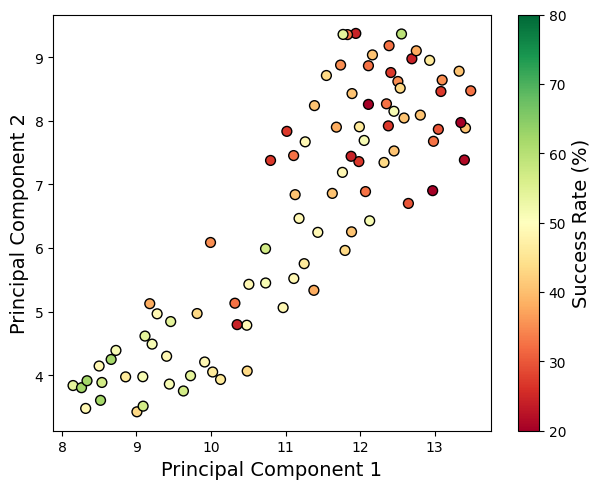

In [34]:
norm = Normalize(vmin=20, vmax=80)
fig, ax = plt.subplots(figsize=(6.2, 5))
# Creating a dummy scatter plot for the colorbar
scatter = ax.scatter(tsne_results[:,0], tsne_results[:,1], c=success_rate, s=50,
                     cmap='RdYlGn', alpha=1, edgecolors='k', linewidth=1, norm=norm)
ax.set_xlabel('Principal Component 1', fontsize=14)
ax.set_ylabel('Principal Component 2', fontsize=14)
ax.spines['right'].set_visible(True)
ax.spines['top'].set_visible(True)
cbar = fig.colorbar(scatter, ax=ax, orientation="vertical")
cbar.set_ticks(np.arange(20, 81, 10))  # Setting ticks at regular intervals
cbar.set_label('Success Rate (%)', fontsize=14)
plt.tight_layout()
fig.savefig("./figure/Figure_S5c.svg", format='svg')
fig.savefig("./figure/Figure_S5c.png", format='png')
plt.show()

# Figure S5d
### Session two colored by success rate.

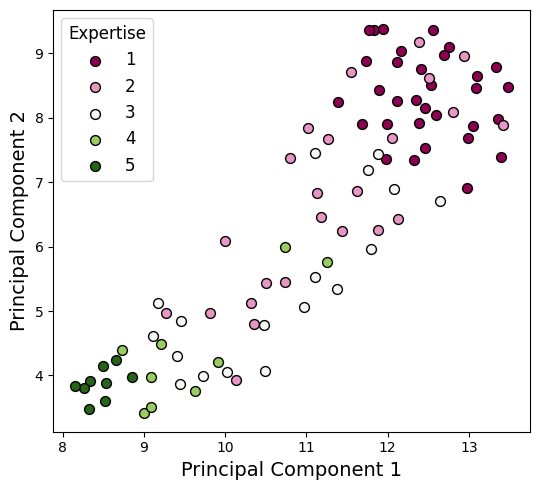

In [35]:
# Create a colormap for the endpoints
unique_endpoints = endpoint_data[endpoint_column].unique()
unique_endpoints = ["LogP", "Permeability", "Solubility", "LogD", "hERG"]
colors = plt.get_cmap('PiYG')(np.linspace(0.2, .8, len(unique_endpoints)))  # Using colors from the PiYG colormap
# Plotting
fig, ax = plt.subplots(figsize=(5.5, 5))
# Create a DataFrame for plotting
pv = pd.DataFrame({
    'Component_1': tsne_results[:, 0],
    'Component_2': tsne_results[:, 1],
    'Chemist_Level': chemist_levels
})
pv = pv.sort_values("Chemist_Level")
# Getting unique chemist levels and creating a color map for them
unique_levels = pv['Chemist_Level'].unique()
colors = plt.get_cmap('PiYG')(np.linspace(0, 1, len(unique_levels)))
level_to_color = dict(zip(unique_levels, colors))
# Plotting
# Plot each chemist level with its color
for level, color in level_to_color.items():
    level_data = pv[pv['Chemist_Level'] == level]
    ax.scatter(level_data['Component_1'], level_data['Component_2'], 
               color=color, label=str(int(level)), s=50, alpha=1, edgecolors='k', linewidth=1)
# Set titles and labels
ax.set_xlabel('Principal Component 1', fontsize=14)
ax.set_ylabel('Principal Component 2', fontsize=14)
ax.spines['right'].set_visible(True)
ax.spines['top'].set_visible(True)
# Create a legend
ax.legend(title='Expertise', fontsize=12, title_fontsize=12, loc='best')
plt.tight_layout()
fig.savefig("./figure/Figure_S5d.svg", format='svg')
fig.savefig("./figure/Figure_S5d.png", format='png')
plt.show()

# Figure S6
### Evolution of the collective success rate against the number of participants in the population per aggregation method. The collective answer is denoted per expertise group, from non-expert (1-2), expert (3-5), and all participants.  

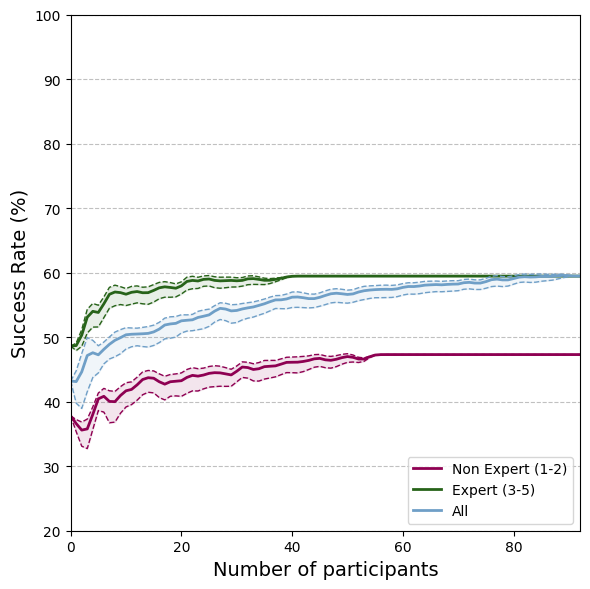

In [36]:
name_agg = 'Most Frequent'
meth_agg = 'most_frequent'
admet = False
plot_aggregation_ExpertGroup(f"./data/CollectiveIntelligence/Evolutive_CI_{meth_agg}.csv",f"./figure/Figure_S6-{meth_agg}.png", name_agg, admet)

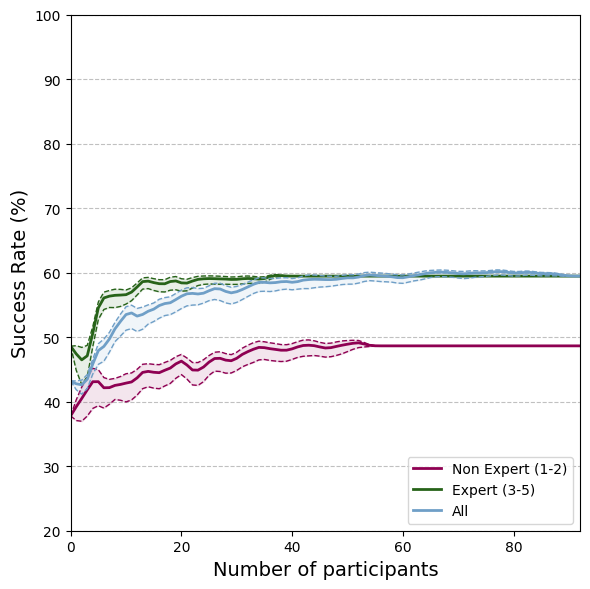

In [37]:
name_agg = 'Log Odds'
meth_agg = 'log_odds'
admet = False
plot_aggregation_ExpertGroup(f"./data/CollectiveIntelligence/Evolutive_CI_{meth_agg}.csv",f"./figure/Figure_S6-{meth_agg}.png", name_agg, admet)

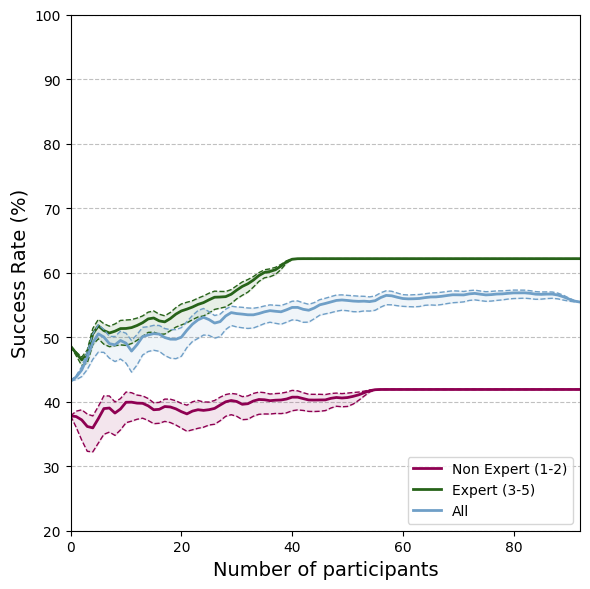

In [38]:
name_agg = 'Fuzzy Logic Aggregation'
meth_agg = 'fuzzy_logic_aggregation'
admet = False
plot_aggregation_ExpertGroup(f"./data/CollectiveIntelligence/Evolutive_CI_{meth_agg}.csv",f"./figure/Figure_S6-{meth_agg}.png", name_agg, admet)

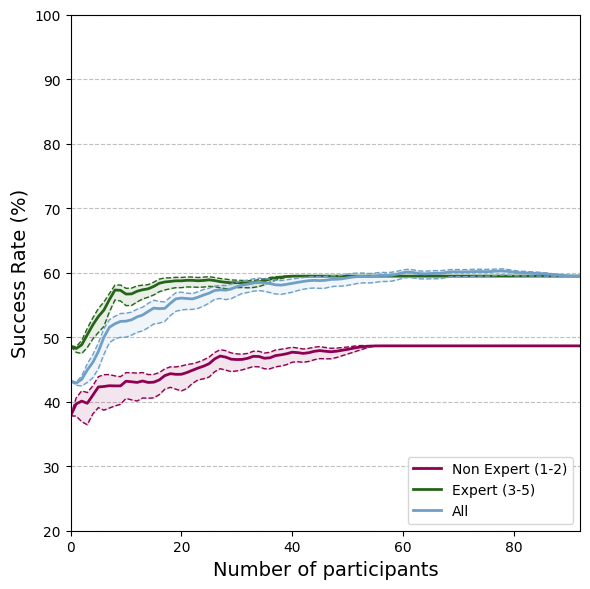

In [39]:
name_agg = 'Certitude Weight'
meth_agg = 'weighted_by_certitude'
# colors =['#94568c', '#65ab7c', '#2976bb']

admet = False
plot_aggregation_ExpertGroup(f"./data/CollectiveIntelligence/Evolutive_CI_{meth_agg}.csv",f"./figure/Figure_S6-{meth_agg}.png", name_agg, admet)

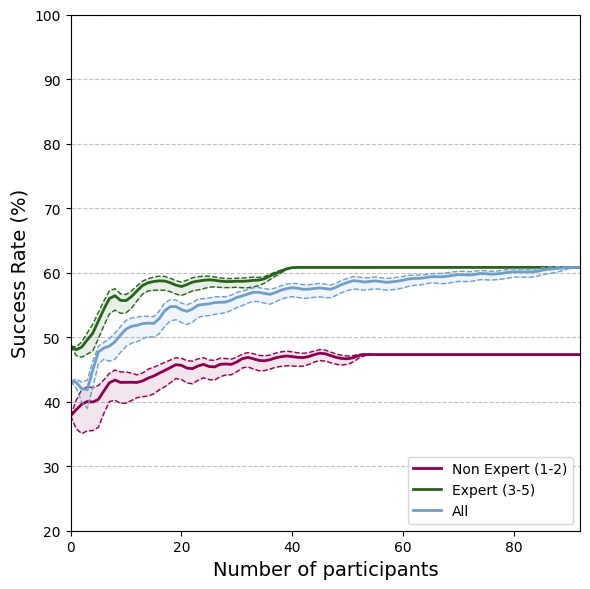

In [40]:
name_agg = 'Certitude & Expertise Weight'
meth_agg = 'weighted_by_certitude_and_expertise'
admet = False
plot_aggregation_ExpertGroup(f"./data/CollectiveIntelligence/Evolutive_CI_{meth_agg}.csv",f"./figure/Figure_S6-{meth_agg}.png", name_agg, admet)

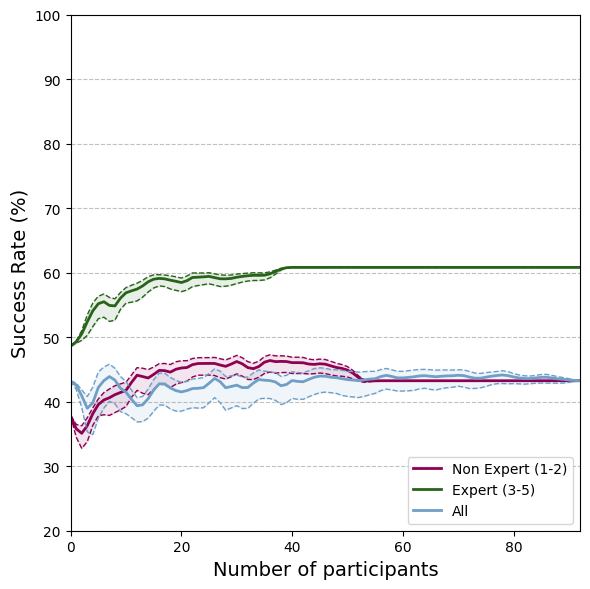

In [41]:
name_agg = 'Expertise Weight'
meth_agg = 'weighted_by_expertise'
admet = False
plot_aggregation_ExpertGroup(f"./data/CollectiveIntelligence/Evolutive_CI_{meth_agg}.csv",f"./figure/Figure_S6-{meth_agg}.png", name_agg, admet)

# Figure S7
### Evolution of the collective success rate against the number of participants in the population per aggregation method for the LogP endpoint. The collective answer is denoted per expertise group, from non-expert (1-2), expert (3-5), and all participants. 

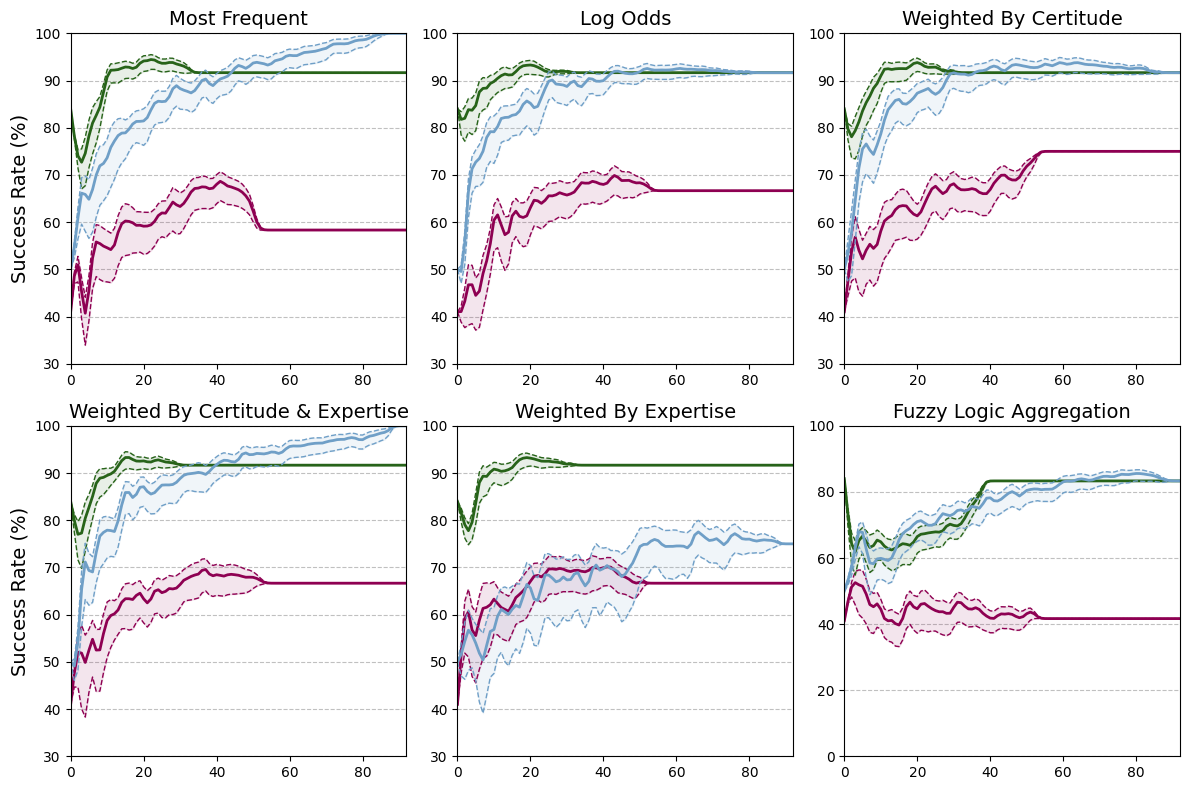

In [42]:
fig, axes = plt.subplots(2, 3, figsize=(12, 8))  # Adjust the figsize as needed
# Example loop structure for 5 admet_ag and 6 meth_agg
for b, admet_ag  in enumerate(['LogP']):
    i=0
    for d, meth_agg in enumerate(["most_frequent","log_odds","weighted_by_certitude","weighted_by_certitude_and_expertise","weighted_by_expertise", "fuzzy_logic_aggregation"]):
        j = d
        if j >= 3:
            i=1
            j=d-3
        csv_file_path = f"./data/CollectiveIntelligence/Evolutive_CI_ADMET_{admet_ag}_{meth_agg}___STD.csv"
        plot_aggregation_S7(axes[i, j], csv_file_path,meth_agg, admet_ag, i, j)
plt.ylim((0,100))
# Optionally adjust layout, add titles, etc.
plt.tight_layout()
fig.savefig(f"./figure/Figure_S7.png", dpi=300, bbox_inches='tight')
fig.savefig(f"./figure/Figure_S7.svg", dpi=300, bbox_inches='tight')

# Figure S8
### Evolution of the collective success rate against the number of participants in the population per aggregation method for the permeability endpoint. The collective answer is denoted per expertise group, from non-expert (1-2), expert (3-5), and all participants.

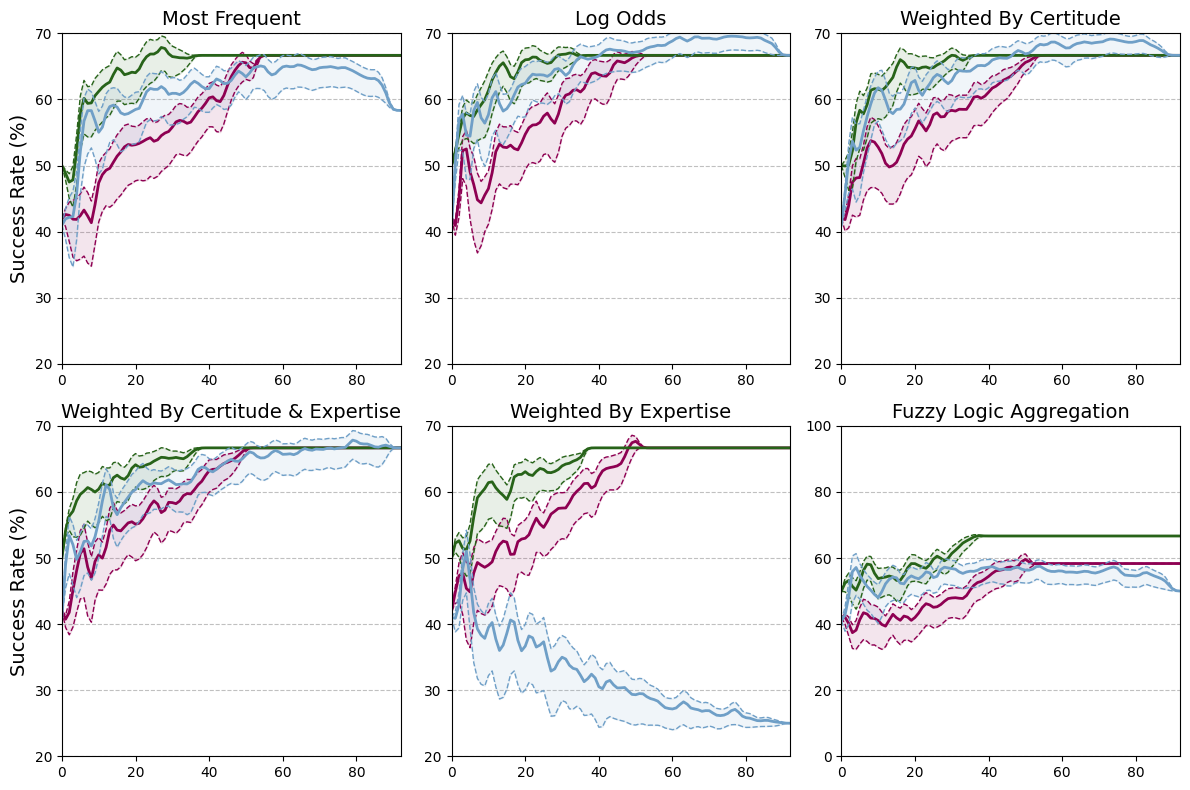

In [43]:
fig, axes = plt.subplots(2, 3, figsize=(12, 8))  # Adjust the figsize as needed
# Example loop structure for 5 admet_ag and 6 meth_agg
for b, admet_ag  in enumerate(['Permeability']):
    i=0
    for d, meth_agg in enumerate(["most_frequent","log_odds","weighted_by_certitude","weighted_by_certitude_and_expertise", "weighted_by_expertise","fuzzy_logic_aggregation"]):
        j = d
        if j >= 3:
            i=1
            j=d-3
        csv_file_path = f"./data/CollectiveIntelligence/Evolutive_CI_ADMET_{admet_ag}_{meth_agg}___STD.csv"
        plot_aggregation_S7(axes[i, j], csv_file_path,meth_agg, admet_ag, i, j)
plt.ylim((0,100))
# Optionally adjust layout, add titles, etc.
plt.tight_layout()
fig.savefig(f"./figure/Figure_S8.png", dpi=300, bbox_inches='tight')
fig.savefig(f"./figure/Figure_S8.svg", dpi=300, bbox_inches='tight')

# Figure S9
### Evolution of the collective success rate against the number of participants in the population per aggregation method for the solubility endpoint. The collective answer is denoted per expertise group, from non-expert (1-2), expert (3-5), and all participants. 

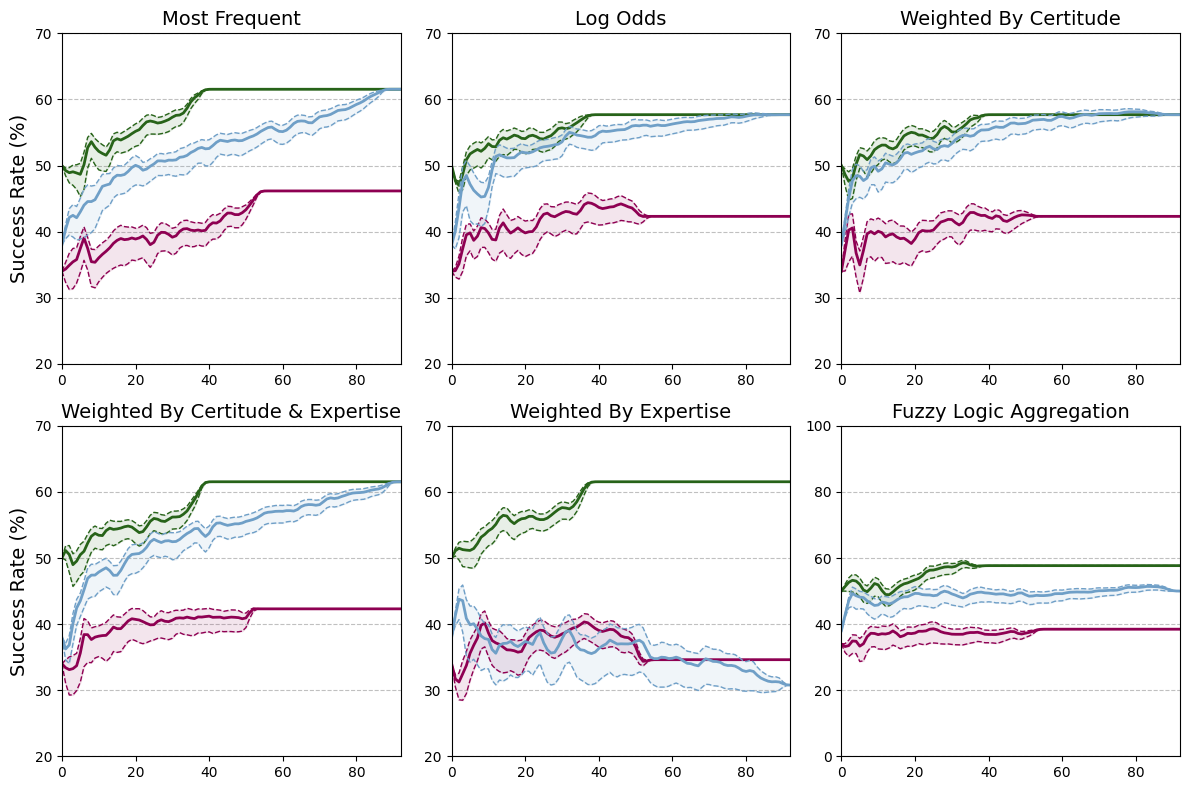

In [44]:
fig, axes = plt.subplots(2, 3, figsize=(12, 8))  # Adjust the figsize as needed
# Example loop structure for 5 admet_ag and 6 meth_agg
for b, admet_ag  in enumerate(['Solubility']):
    i=0
    for d, meth_agg in enumerate(["most_frequent","log_odds","weighted_by_certitude","weighted_by_certitude_and_expertise",    "weighted_by_expertise","fuzzy_logic_aggregation"]):
        j = d
        if j >= 3:
            i=1
            j=d-3
        csv_file_path = f"./data/CollectiveIntelligence/Evolutive_CI_ADMET_{admet_ag}_{meth_agg}___STD.csv"
        plot_aggregation_S7(axes[i, j], csv_file_path,meth_agg, admet_ag, i, j)
plt.ylim((0,100))
# Optionally adjust layout, add titles, etc.
plt.tight_layout()
fig.savefig(f"./figure/Figure_S9.png", dpi=300, bbox_inches='tight')
fig.savefig(f"./figure/Figure_S9.svg", dpi=300, bbox_inches='tight')

# Figure S10
### Evolution of the collective success rate against the number of participants in the population per aggregation method for the LogD endpoint. The collective answer is denoted per expertise group, from non-expert (1-2), expert (3-5), and all participants. 

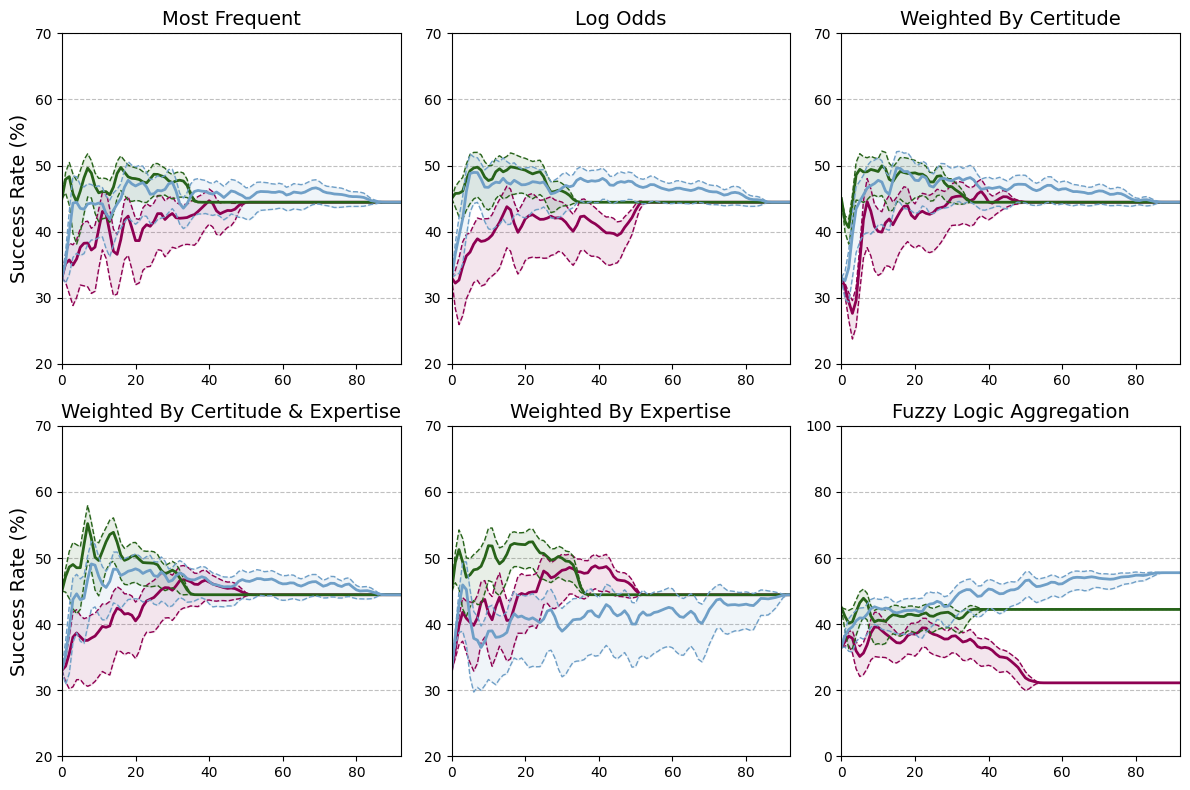

In [45]:
fig, axes = plt.subplots(2, 3, figsize=(12, 8))  # Adjust the figsize as needed
# Example loop structure for 5 admet_ag and 6 meth_agg
for b, admet_ag  in enumerate(['LogD']):
    i=0
    for d, meth_agg in enumerate(["most_frequent","log_odds","weighted_by_certitude","weighted_by_certitude_and_expertise", "weighted_by_expertise","fuzzy_logic_aggregation"]):
        j = d
        if j >= 3:
            i=1
            j=d-3
        csv_file_path = f"./data/CollectiveIntelligence/Evolutive_CI_ADMET_{admet_ag}_{meth_agg}___STD.csv"
        plot_aggregation_S7(axes[i, j], csv_file_path,meth_agg, admet_ag, i, j)
plt.ylim((0,100))
# Optionally adjust layout, add titles, etc.
plt.tight_layout()
fig.savefig(f"./figure/Figure_S10.png", dpi=300, bbox_inches='tight')
fig.savefig(f"./figure/Figure_S10.svg", dpi=300, bbox_inches='tight')

# Figure S11
### Evolution of the collective success rate against the number of participants in the population per aggregation method for the hERG endpoint. The collective answer is denoted per expertise group, from non-expert (1-2), expert (3-5), and all participants. 

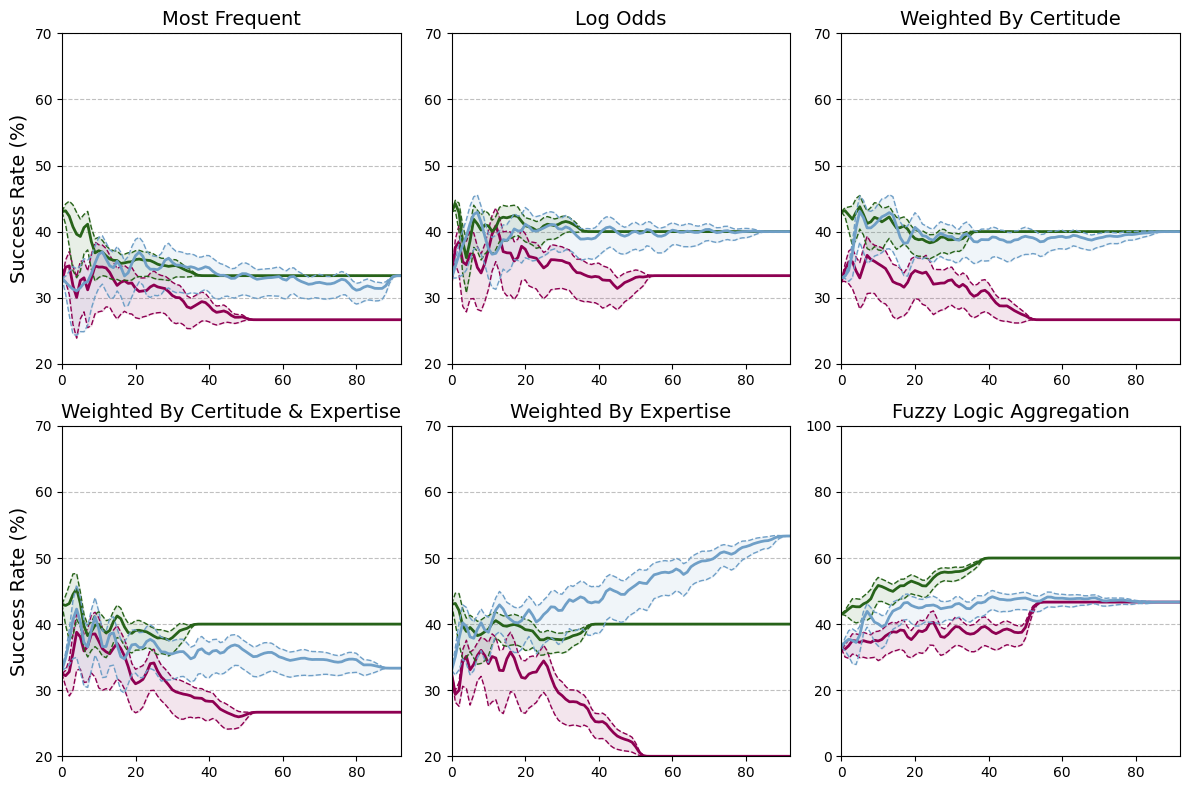

In [46]:
fig, axes = plt.subplots(2, 3, figsize=(12, 8))  # Adjust the figsize as needed
# Example loop structure for 5 admet_ag and 6 meth_agg
for b, admet_ag  in enumerate(['hERG']):
    i=0
    for d, meth_agg in enumerate(["most_frequent","log_odds","weighted_by_certitude","weighted_by_certitude_and_expertise",        "weighted_by_expertise","fuzzy_logic_aggregation"]):
        j = d
        if j >= 3:
            i=1
            j=d-3
        csv_file_path = f"./data/CollectiveIntelligence/Evolutive_CI_ADMET_{admet_ag}_{meth_agg}___STD.csv"
        plot_aggregation_S7(axes[i, j], csv_file_path,meth_agg, admet_ag, i, j)
plt.ylim((0,100))
# Optionally adjust layout, add titles, etc.
plt.tight_layout()
fig.savefig(f"./figure/Figure_S11.png", dpi=300, bbox_inches='tight')
fig.savefig(f"./figure/Figure_S11.svg", dpi=300, bbox_inches='tight')

# Figure S12

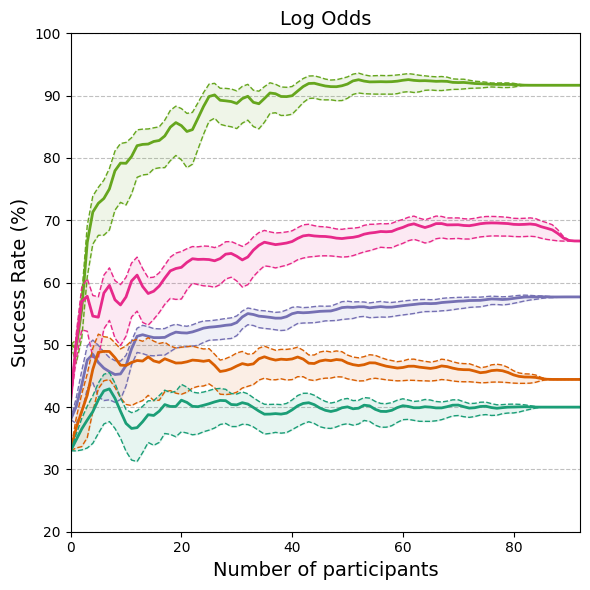

In [47]:
# Set up figure and axis
fig, ax = plt.subplots(figsize=(6, 6))
# List of ADMET endpoints
admet_endpoints = ['LogP', 'Permeability', 'Solubility', 'LogD', 'hERG']
colors = plt.cm.viridis(np.linspace(0, 1, len(admet_endpoints)))  # Using Viridis colormap for distinct colors
# Endpoint to color mapping
# Endpoint to color mapping
endpoint_to_color = {
    'LogP': "#66a61e",
    'Permeability': "#e7298a",
    'Solubility':"#7570b3",
    'LogD': "#d95f02",
    'hERG': "#1b9e77"}
# Loop over each ADMET endpoint and plot
for i, admet in enumerate(admet_endpoints):
    csv_file_path = f"./data/CollectiveIntelligence/Evolutive_CI_ADMET_{admet}_log_odds___STD.csv"
    color = endpoint_to_color.get(admet, (1, 1, 1)) # Default to white if endpoint not found
    plot_aggregation_ADMET(ax, csv_file_path, "log_odds", admet, color, "Log Odds")
# ax.legend( loc = 'lower right')
ax.set_ylim(20, 100) # Adjust y-axis limits if necessary
ax.set_xlim(0, 92) # Adjust y-axis limits if necessary
plt.tight_layout()
fig.savefig("./figure/Figure_S12-log_odds.png", dpi=300, bbox_inches='tight')
fig.savefig("./figure/Figure_S12-log_odds.svg", dpi=300, bbox_inches='tight')
plt.show()

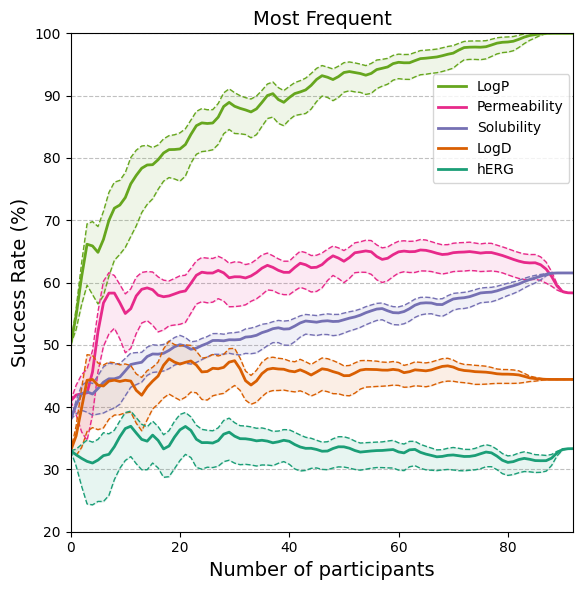

In [48]:
# Set up figure and axis
fig, ax = plt.subplots(figsize=(6, 6))
# List of ADMET endpoints
admet_endpoints = ['LogP', 'Permeability', 'Solubility', 'LogD', 'hERG']
colors = plt.cm.viridis(np.linspace(0, 1, len(admet_endpoints)))  # Using Viridis colormap for distinct colors
# Endpoint to color mapping
# Endpoint to color mapping
endpoint_to_color = {
    'LogP': "#66a61e",
    'Permeability': "#e7298a",
    'Solubility':"#7570b3",
    'LogD': "#d95f02",
    'hERG': "#1b9e77"
}
# Loop over each ADMET endpoint and plot
for i, admet in enumerate(admet_endpoints):
    csv_file_path = f"./data/CollectiveIntelligence/Evolutive_CI_ADMET_{admet}_most_frequent___STD.csv"
    color = endpoint_to_color.get(admet, (1, 1, 1)) # Default to white if endpoint not found
    plot_aggregation_ADMET(ax, csv_file_path, "most_frequent", admet, color, "Most Frequent")
ax.legend( loc = (0.72, .7), frameon=True)
ax.set_ylim(20, 100) # Adjust y-axis limits if necessary
ax.set_xlim(0, 92) # Adjust y-axis limits if necessary
plt.tight_layout()
fig.savefig("./figure/Figure_S12-most_frequent.png", dpi=300, bbox_inches='tight')
fig.savefig("./figure/Figure_S12-most_frequent.svg", dpi=300, bbox_inches='tight')
plt.show()

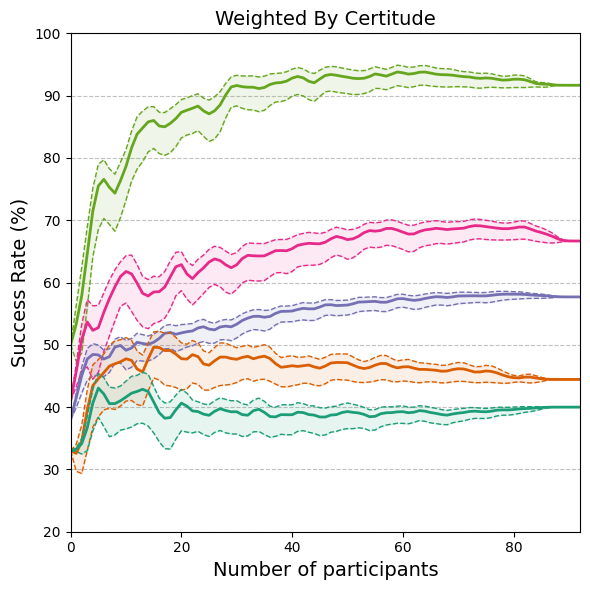

In [49]:
# Set up figure and axis
fig, ax = plt.subplots(figsize=(6, 6))
# List of ADMET endpoints
admet_endpoints = ['LogP', 'Permeability', 'Solubility', 'LogD', 'hERG']
colors = plt.cm.viridis(np.linspace(0, 1, len(admet_endpoints)))  # Using Viridis colormap for distinct colors
# Endpoint to color mapping
# Endpoint to color mapping
endpoint_to_color = {
    'LogP': "#66a61e",
    'Permeability': "#e7298a",
    'Solubility':"#7570b3",
    'LogD': "#d95f02",
    'hERG': "#1b9e77"
}
# Loop over each ADMET endpoint and plot
for i, admet in enumerate(admet_endpoints):
    csv_file_path = f"./data/CollectiveIntelligence/Evolutive_CI_ADMET_{admet}_weighted_by_certitude___STD.csv"
    color = endpoint_to_color.get(admet, (1, 1, 1)) # Default to white if endpoint not found
    plot_aggregation_ADMET(ax, csv_file_path,  "weighted_by_certitude", admet, color, "Weighted By Certitude")
ax.set_ylim(20, 100) # Adjust y-axis limits if necessary
ax.set_xlim(0, 92) # Adjust y-axis limits if necessary
plt.tight_layout()
fig.savefig("./figure/Figure_S12-weighted_by_certitude.png", dpi=300, bbox_inches='tight')
fig.savefig("./figure/Figure_S12-weighted_by_certitude.svg", dpi=300, bbox_inches='tight')
plt.show()

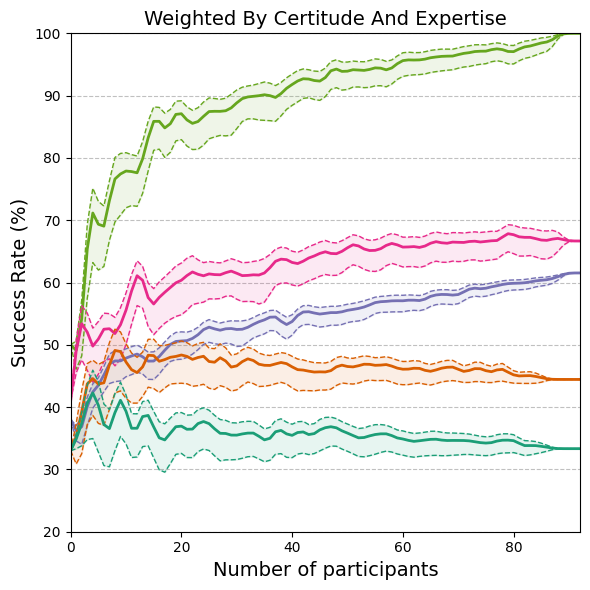

In [50]:
# Set up figure and axis
fig, ax = plt.subplots(figsize=(6, 6))
# List of ADMET endpoints
admet_endpoints = ['LogP', 'Permeability', 'Solubility', 'LogD', 'hERG']
colors = plt.cm.viridis(np.linspace(0, 1, len(admet_endpoints)))  # Using Viridis colormap for distinct colors
# Endpoint to color mapping
# Endpoint to color mapping
endpoint_to_color = {
    'LogP': "#66a61e",
    'Permeability': "#e7298a",
    'Solubility':"#7570b3",
    'LogD': "#d95f02",
    'hERG': "#1b9e77"
}
# Loop over each ADMET endpoint and plot
for i, admet in enumerate(admet_endpoints):
    csv_file_path = f"./data/CollectiveIntelligence/Evolutive_CI_ADMET_{admet}_weighted_by_certitude_and_expertise___STD.csv"
    color = endpoint_to_color.get(admet, (1, 1, 1)) # Default to white if endpoint not found
    plot_aggregation_ADMET(ax, csv_file_path,  "weighted_by_certitude_and_expertis", admet, color, "Weighted By Certitude And Expertise")
ax.set_ylim(20, 100) # Adjust y-axis limits if necessary
ax.set_xlim(0, 92) # Adjust y-axis limits if necessary
plt.tight_layout()
fig.savefig("./figure/Figure_S12-weighted_by_certitude_and_expertis.png", dpi=300, bbox_inches='tight')
fig.savefig("./figure/Figure_S12-weighted_by_certitude_and_expertis.svg", dpi=300, bbox_inches='tight')
plt.show()

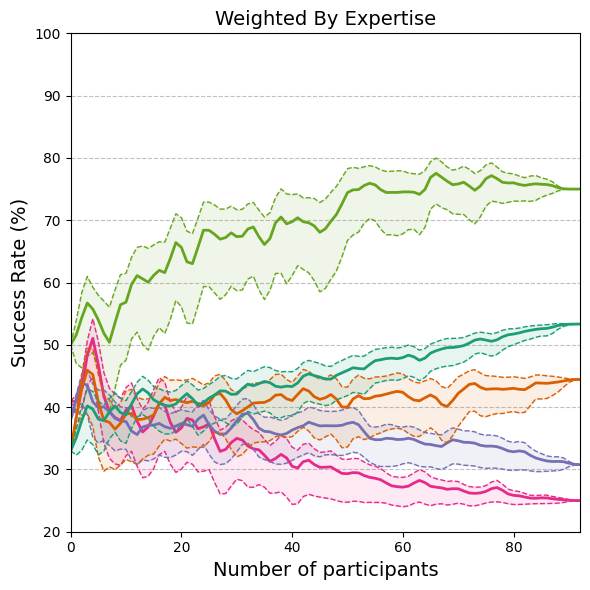

In [51]:
# Set up figure and axis
fig, ax = plt.subplots(figsize=(6, 6))
# List of ADMET endpoints
admet_endpoints = ['LogP', 'Permeability', 'Solubility', 'LogD', 'hERG']
colors = plt.cm.viridis(np.linspace(0, 1, len(admet_endpoints)))  # Using Viridis colormap for distinct colors
# Endpoint to color mapping
# Endpoint to color mapping
endpoint_to_color = {
    'LogP': "#66a61e",
    'Permeability': "#e7298a",
    'Solubility':"#7570b3",
    'LogD': "#d95f02",
    'hERG': "#1b9e77"
}
# Loop over each ADMET endpoint and plot
for i, admet in enumerate(admet_endpoints):
    csv_file_path = f"./data/CollectiveIntelligence/Evolutive_CI_ADMET_{admet}_weighted_by_expertise___STD.csv"
    color = endpoint_to_color.get(admet, (1, 1, 1)) # Default to white if endpoint not found
    plot_aggregation_ADMET(ax, csv_file_path,  "weighted_by_expertise", admet, color, "Weighted By Expertise")
ax.set_ylim(20, 100) # Adjust y-axis limits if necessary
ax.set_xlim(0, 92) # Adjust y-axis limits if necessary
plt.tight_layout()
fig.savefig("./figure/Figure_S12-weighted_by_expertise.png", dpi=300, bbox_inches='tight')
fig.savefig("./figure/Figure_S12-weighted_by_expertise.svg", dpi=300, bbox_inches='tight')
plt.show()

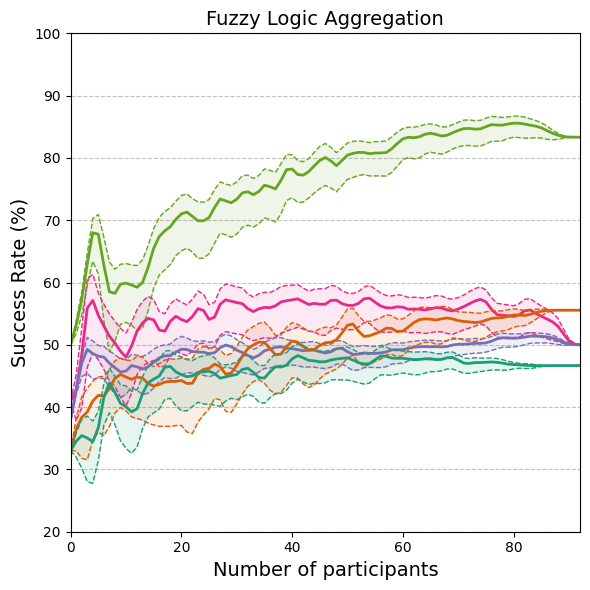

In [52]:
# Set up figure and axis
fig, ax = plt.subplots(figsize=(6, 6))
# List of ADMET endpoints
admet_endpoints = ['LogP', 'Permeability', 'Solubility', 'LogD', 'hERG']
colors = plt.cm.viridis(np.linspace(0, 1, len(admet_endpoints)))  # Using Viridis colormap for distinct colors
# Endpoint to color mapping
# Endpoint to color mapping
endpoint_to_color = {
    'LogP': "#66a61e",
    'Permeability': "#e7298a",
    'Solubility':"#7570b3",
    'LogD': "#d95f02",
    'hERG': "#1b9e77"
}
# Loop over each ADMET endpoint and plot
for i, admet in enumerate(admet_endpoints):
    csv_file_path = f"./data/CollectiveIntelligence/Evolutive_CI_ADMET_{admet}_fuzzy_logic_aggregation___STD.csv"
    color = endpoint_to_color.get(admet, (1, 1, 1)) # Default to white if endpoint not found
    plot_aggregation_ADMET(ax, csv_file_path,  "fuzzy_logic_aggregation", admet, color, "Fuzzy Logic Aggregation")
ax.set_ylim(20, 100) # Adjust y-axis limits if necessary
ax.set_xlim(0, 92) # Adjust y-axis limits if necessary
plt.tight_layout()
fig.savefig("./figure/Figure_S12-fuzzy_logic_aggregation.png", dpi=300, bbox_inches='tight')
fig.savefig("./figure/Figure_S12-fuzzy_logic_aggregation.svg", dpi=300, bbox_inches='tight')
plt.show()

# Figure S13
### t-SNE map of the collective intelligence chemical space per endpoint. Each point represents a unique compound colored by the success rate of the related question. 

/cloud-data/snf-mgln-idd-workspace/cadd_vitry/CI_Analysis_Pierre/CI_Git/__all_functions.py:1557: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  endpoint_data[sr_column] *= 100


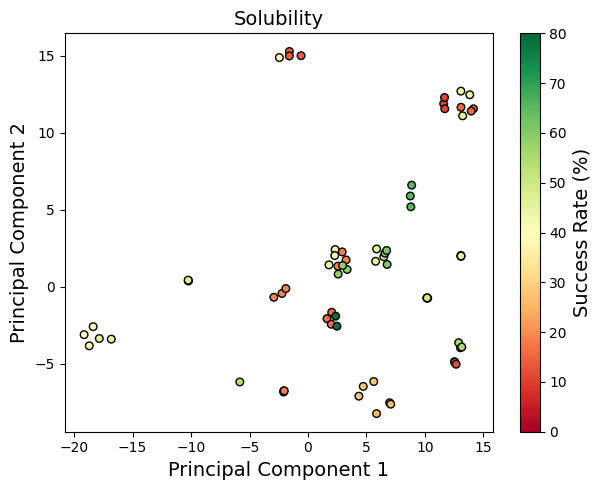

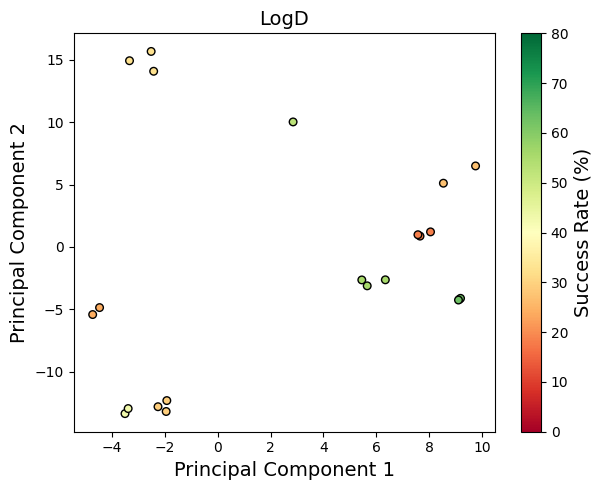

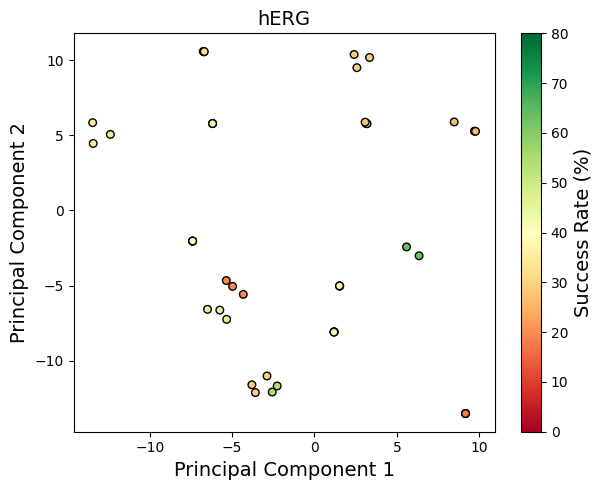

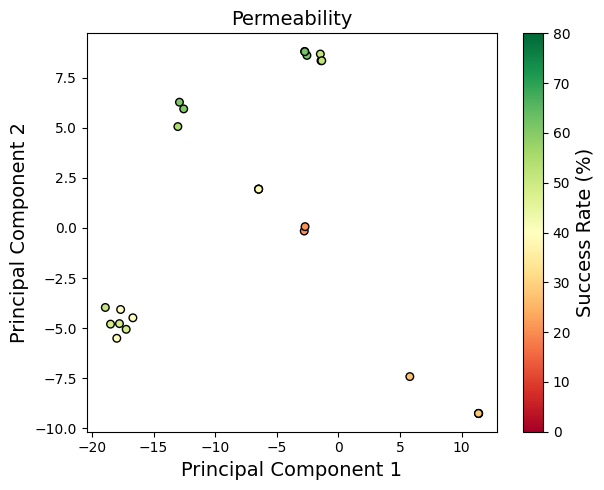

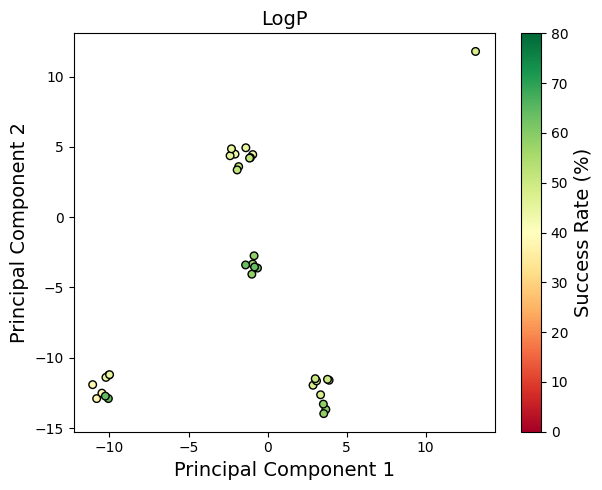

In [53]:
sr_column='SR'
endpoint_column='Endpoint'
answer_correct_column='Answer_Correct'
endpoint_data = result_df_SLIDE_to_SR.copy()
# Group by total_smiles and calculate the mean SR
mean_sr_per_smiles = endpoint_data.groupby("total_smiles")[sr_column].mean()
mean_sr_per_smiles = pd.DataFrame(mean_sr_per_smiles.reset_index())
result_df_SLIDE_to_SR_k = result_df_SLIDE_to_SR.merge(mean_sr_per_smiles, on='total_smiles')
result_df_SLIDE_to_SR_k = result_df_SLIDE_to_SR_k.drop_duplicates("total_smiles")
endpoint_data = result_df_SLIDE_to_SR_k.rename(columns={"SR_x": "SR"})
# Example usage with your DataFrame
plot_tsne_per_endpoint(endpoint_data)

# Figure S14
### Distribution of experimental measurements from public data used for modelling purposes. The present endpoints are expressed in log10(Coctanol/Cwater) for LogP, log10(cm/s) for permeability, log10(Cbuffer) for solubility, log10(Coctanol/Cbuffer) for LogD, and pIC50 for hERG inhibition. 

In [54]:
LogP = pd.read_csv("./data/ADMET/LogP.csv")
LogD = pd.read_csv("./data/ADMET/LogD.csv")
Papp = pd.read_csv("./data/ADMET/Papp.csv")
Sapp = pd.read_csv("./data/ADMET/Sapp.csv")
hERG = pd.read_csv("./data/ADMET/hERG.csv")

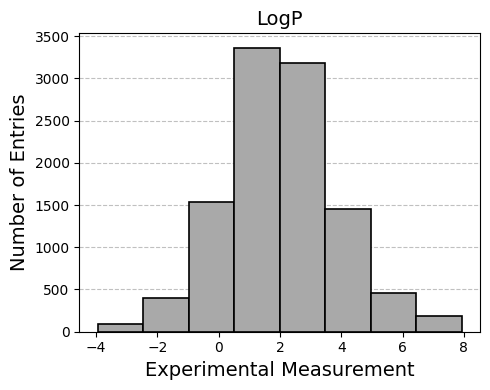

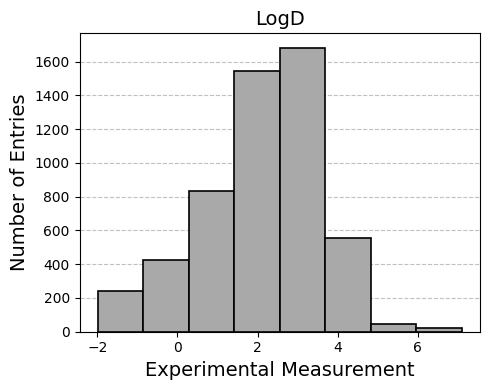

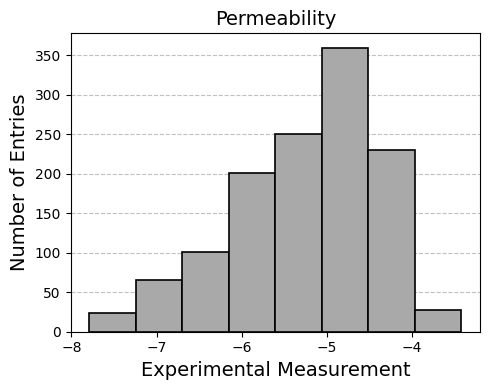

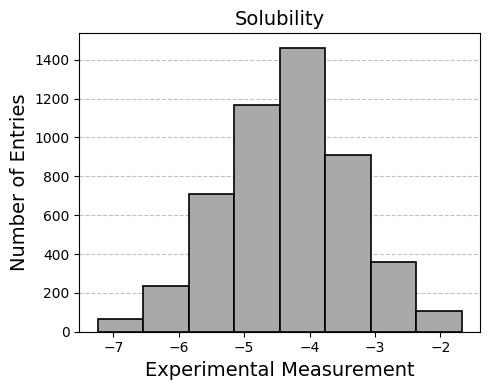

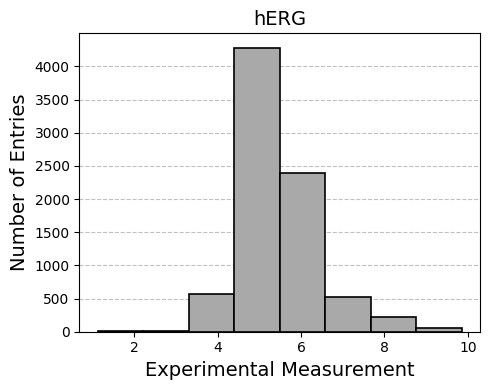

In [55]:
plot_distribution(LogP, "LogP")
plot_distribution(LogD, "LogD")
plot_distribution(Papp, "Permeability")
plot_distribution(Sapp, "Solubility")
plot_distribution(hERG, "hERG")

# Figure S15
### Correlation between experimental and predicted value per endpoint. The coloration depicts the density of compounds as the base-10 logarithm of the number of unique compounds. Answer success and failure count per ADMET endpoint. Answers are grouped per source such as human, GNN (predictive model), GNN & Human, and all.

mae 0.31971193466955394
rmse 0.464737047554525
r2 0.9342719946427518
mae 0.45103459868225904
rmse 0.5875386726813028
r2 0.4960623399351891
mae 0.5158406505630594
rmse 0.6758815128503227
r2 0.47557726325439587
mae 0.4385887683742379
rmse 0.6088323392629906
r2 0.8351911363006531
mae 0.4347229740082001
rmse 0.615973308799375
r2 0.5483708894540469


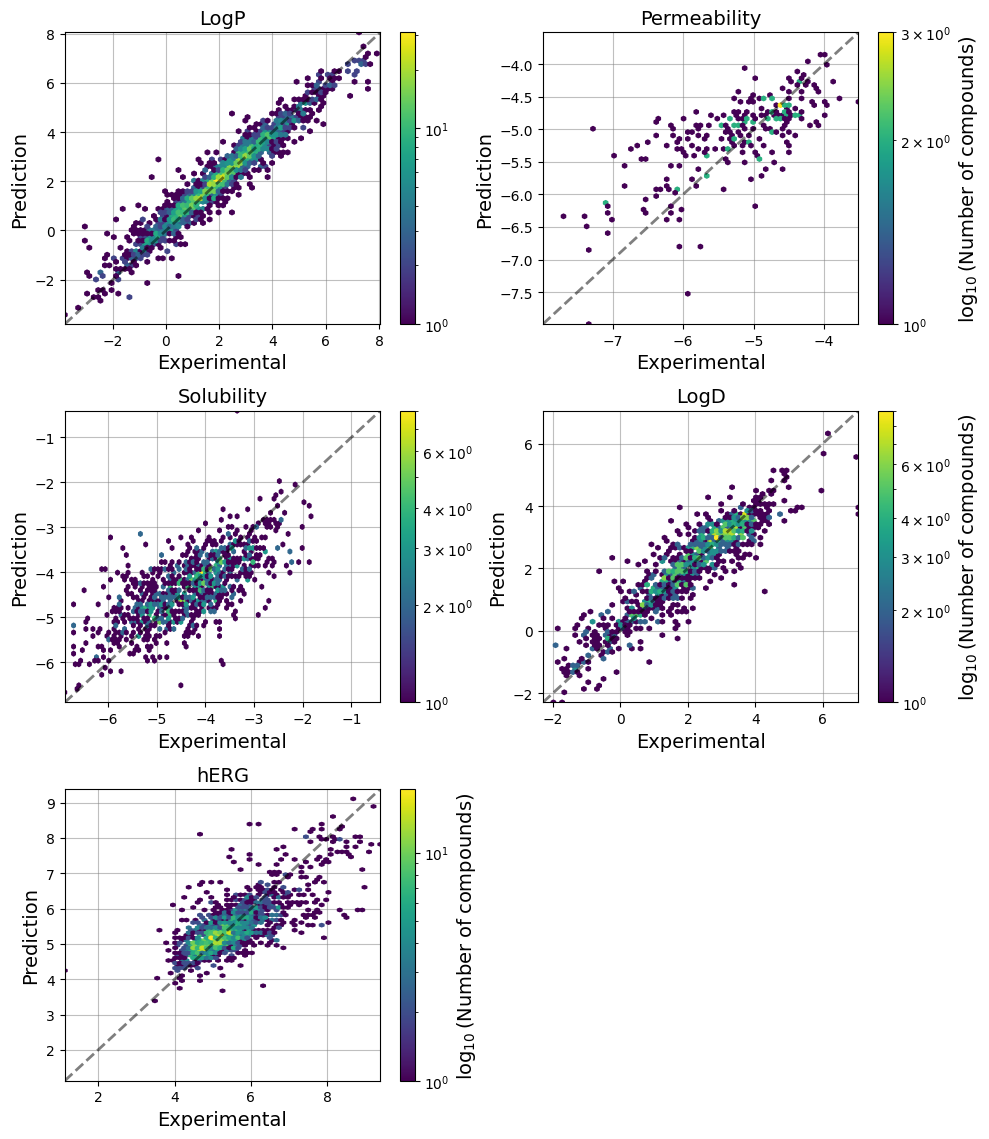

In [56]:
total_cols = 2  # Set the total number of columns
fig, axs = plt.subplots(3, total_cols, figsize=(10, 11.5))  # Create a 3x2 grid
axs = axs.flatten()  # Flatten to 1D array for easy indexing
endpoints = ["LogP", "Papp", "Sapp", "LogD", "hERG"]
for i, endpoint in enumerate(endpoints):
    path_val_output = f"./data/ADMET/{endpoint}__PREDICTION.csv"
    dataframe = pd.read_csv(path_val_output)
    plot_hexbin(dataframe, endpoint, axs[i], i, total_cols)
# Hide the last subplot if it's not being used
if len(endpoints) < len(axs):
    for ax in axs[len(endpoints):]:
        ax.set_visible(False)
# Adjust layout
plt.tight_layout()
plt.savefig(f'./figure/Figure_S15.png', bbox_inches='tight')
plt.savefig(f'./figure/Figure_S15.svg', bbox_inches='tight')
plt.show()